In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [2]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [3]:
import DiadFit as pf
pf.__version__

'0.0.28'

In [4]:
# Add the path with your spectra in
meta_path=r"G:\My Drive\Berkeley_NEW\DiadFit_outer\Testing\Error_Leilani\METADATA"
spectra_path=r"G:\My Drive\Berkeley_NEW\DiadFit_outer\Testing\Error_Leilani\SPECTRA"

In [5]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt'
# Specifying the extension here helps to filter out other file types,
# e.g. png files that may be in the folder
file_ext='.txt'
# If your instrument appends a nubmer like 01, 02 to each file, prefix=True removes it
prefix=False

## This function finds all files in your path with the specified file format
- As you will fit your Ne lines in a different workbook, you can use 'exclude_str' to put any text that appears in all your Ne files, and it won't look here

In [6]:
Diad_files=pf.get_files(path=spectra_path, file_ext=file_ext, exclude_str='Ne',
                            exclude_str_2='nodiad', exclude_str_3='Si_Chip')
Diad_files[0:5]

['LL4-FI1-#1.txt',
 'LL4-FI1-#2 (1).txt',
 'LL4-FI1-#2.txt',
 'LL7-107-FI#2_12mW1acc.txt',
 'LL7-107-FI#2_6mW.txt']

## Must be a way of filtering them on strength...

In [7]:
max_diad1=np.empty(len(Diad_files), dtype=float)
max_diad2=np.empty(len(Diad_files), dtype=float)
index_diad=np.empty(len(Diad_files), dtype=float)
i=0
for file in Diad_files:
    
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    
    Med_LHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1180)& (Diad[:, 0]<1220)])
    Med_RHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)])
    Med_LHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1360)])
    Med_RHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1440)& (Diad[:, 0]<1470)])    
    #Med_central_back_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)]
    
    Diad_diad1=Diad[(Diad[:, 0]>1280)& (Diad[:, 0]<1295)]
    Diad_diad2=Diad[(Diad[:, 0]>1385)& (Diad[:, 0]<1395)]
    max_diad1[i]=np.max(Diad_diad1[:, 1])-  (Med_LHS_diad1+Med_RHS_diad1)/2       
    max_diad2[i]=np.max(Diad_diad2[:, 1]) - (Med_LHS_diad2+Med_RHS_diad2)/2 
    index_diad[i]=i
    i=i+1


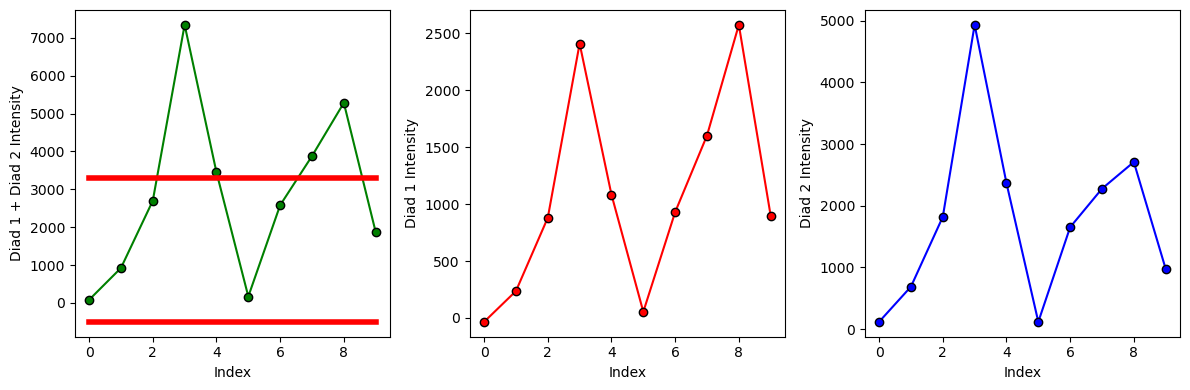

In [8]:
fig, (ax3, ax1, ax2) = plt.subplots(1, 3, figsize=(12,4))

combo_upper_cutoff=3300
combo_lower_cutoff=-500
ax1.set_xlabel('Index')
ax2.set_xlabel('Index')
ax3.set_xlabel('Index')
ax3.set_ylabel('Diad 1 + Diad 2 Intensity')
ax2.set_ylabel('Diad 2 Intensity')
ax1.set_ylabel('Diad 1 Intensity')

ax1.plot(index_diad, max_diad1,  '-r')
ax1.plot(index_diad, max_diad1,  'ok', mfc='red')

ax2.plot(index_diad, max_diad2,  '-b')
ax2.plot(index_diad, max_diad2,  'ok', mfc='blue')

ax3.plot(index_diad, max_diad2+max_diad1,  '-g')
ax3.plot(index_diad, max_diad2+max_diad1,  'ok', mfc='green')
ax3.plot([np.min(index_diad), np.max(index_diad)],
         [combo_upper_cutoff, combo_upper_cutoff], '-r', lw=4)
ax3.plot([np.min(index_diad), np.max(index_diad)],
         [combo_lower_cutoff, combo_lower_cutoff], '-r', lw=4)
## This gets dense diad files
Diad_Files_Dense=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)>combo_upper_cutoff])
Diad_Files_Weak=list(pd.Series(Diad_files).loc[((max_diad2+max_diad1)<=combo_upper_cutoff)
                                               &((max_diad2+max_diad1)>combo_lower_cutoff) ])
Diad_Files_nofit=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)<=combo_lower_cutoff])
# ax1.set_yscale('log')
# ax2.set_yscale('log')
# ax3.set_yscale('log')
fig.tight_layout()

In [9]:
Diad_Files_Weak

['LL4-FI1-#1.txt',
 'LL4-FI1-#2 (1).txt',
 'LL4-FI1-#2.txt',
 'LL7-109-FI.txt',
 'LL7-FI33.txt',
 'LL8-433-FI_6mW.txt']

In [10]:
Diad_Files_Dense

['LL7-107-FI#2_12mW1acc.txt',
 'LL7-107-FI#2_6mW.txt',
 'LL7-FI34.txt',
 'LL8-433-FI_12mW.txt']

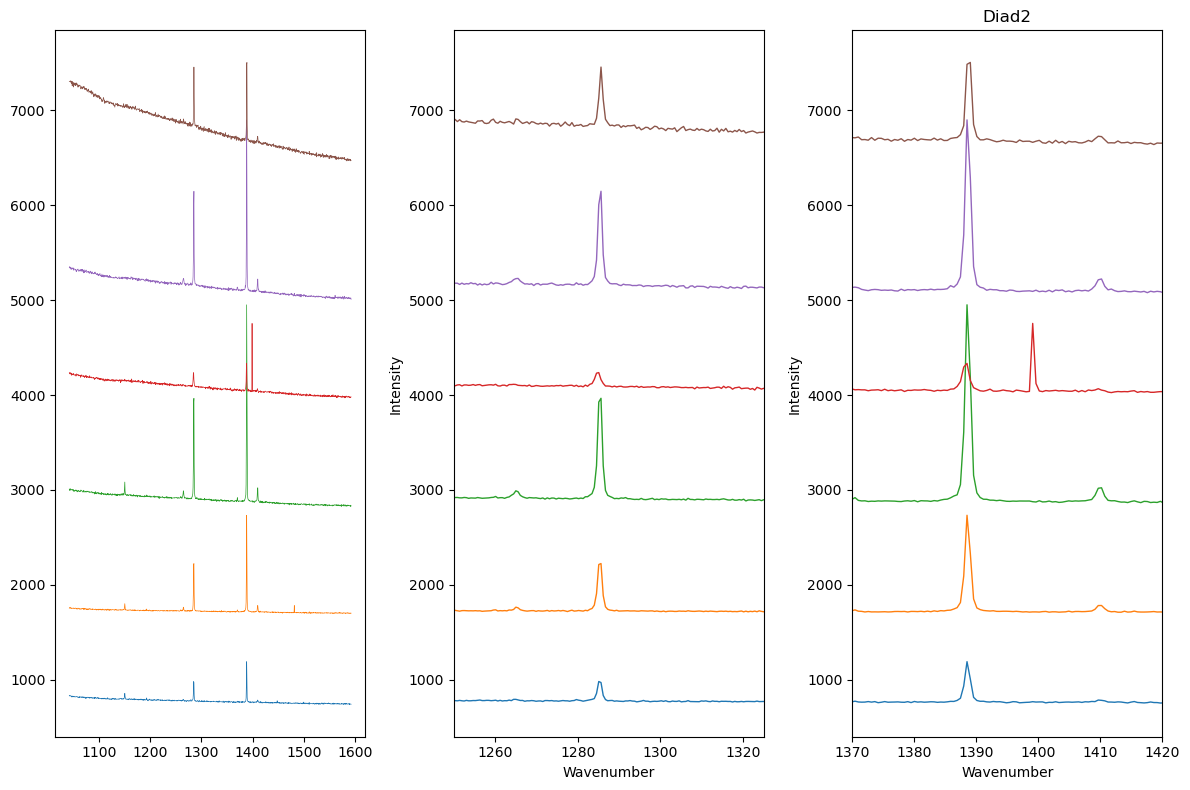

In [11]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,8))
i=0
lw=1
for file in Diad_Files_Weak:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+1000
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

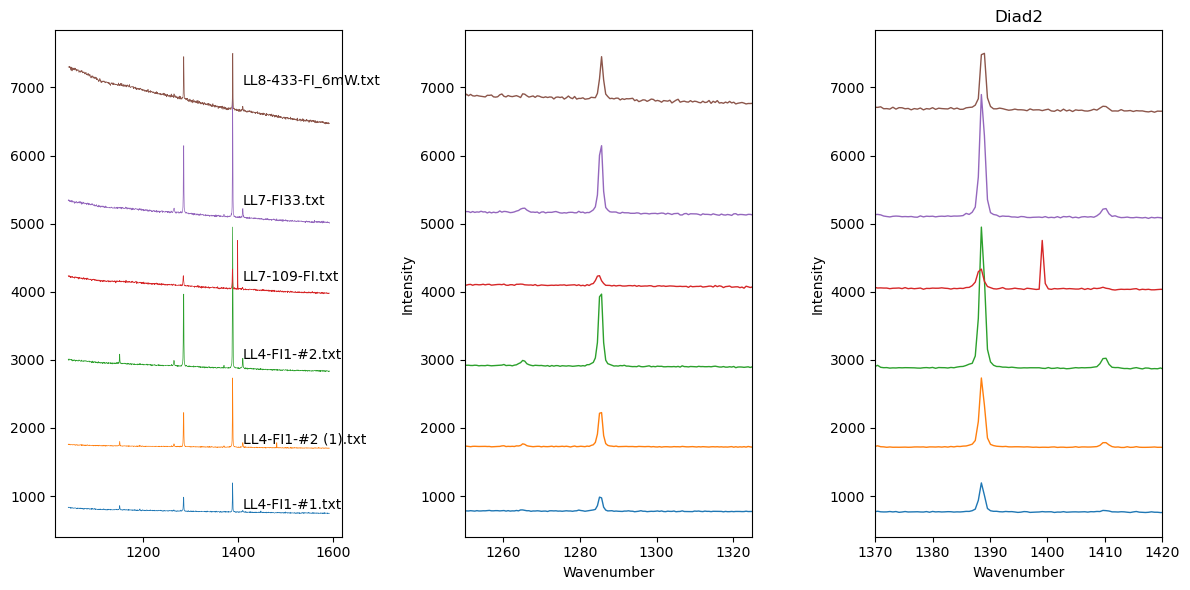

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,len(Diad_Files_Weak)))
i=0
lw=1
for file in Diad_Files_Weak:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax0.annotate(str(file), xy=(1410, np.average(Diad[:, 1])+np.std(Diad[:, 1])+i+0.2), 
                 xycoords="data", fontsize=10)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+1000
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

## Lets deal with specra and metadata now, it helps us work out if we've accidentally duplicated names before it becomes a problem

### Extracting metadata

In [13]:
# Put the common string you can in all your Ne lines here
ID_str='_'
file_ext_meta='txt' # Will only take files of this type 
exclude_str='Ne' # Will exclude files of this type, sometimes images have same name
prefix=None # Leave as none unless witec appended a number
diad_meta=pf.get_files(path=meta_path,
file_ext='txt', exclude_str='Ne', 
            exclude_str_2='ne', 
            exclude_str_3='Si_wafer', 
            exclude_type='.png',    sort=True)
diad_meta


['LL4-FI1-#1.txt',
 'LL4-FI1-#2 (1).txt',
 'LL4-FI1-#2.txt',
 'LL7-107-FI#1_nodiad.txt',
 'LL7-107-FI#2_12mW1acc.txt',
 'LL7-107-FI#2_6mW.txt',
 'LL7-109-FI.txt',
 'LL7-FI33.txt',
 'LL7-FI34.txt',
 'LL8-245_nodiad.txt',
 'LL8-433-FI_12mW.txt',
 'LL8-433-FI_6mW.txt']

In [14]:
# Put the common string you can in all your Ne lines here
ID_str='_'
file_ext_meta='txt' # Will only take files of this type 
exclude_str='Ne' # Will exclude files of this type, sometimes images have same name
prefix=None # Leave as none unless witec appended a number
diad_meta=pf.get_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

diad_meta

['LL7-107-FI#1_nodiad.txt',
 'LL7-107-FI#2_12mW1acc.txt',
 'LL7-107-FI#2_6mW.txt',
 'LL8-245_nodiad.txt',
 'LL8-433-FI_12mW.txt',
 'LL8-433-FI_6mW.txt']

In [15]:
diad_meta

['LL7-107-FI#1_nodiad.txt',
 'LL7-107-FI#2_12mW1acc.txt',
 'LL7-107-FI#2_6mW.txt',
 'LL8-245_nodiad.txt',
 'LL8-433-FI_12mW.txt',
 'LL8-433-FI_6mW.txt']

### Stitching metadata information from all relevant files

In [16]:
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, Allfiles=diad_meta, prefix=False,
                               trupower=True)
meta['filename'].iloc[0]

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 22.95it/s]

Done


'LL8-245_nodiad.txt'

In [17]:
meta

filename               date  power (mW)  Int_time (s)  \
3         LL8-245_nodiad.txt  October 7, 2022\n      12.034          45.0   
4        LL8-433-FI_12mW.txt  October 7, 2022\n      11.991          45.0   
5         LL8-433-FI_6mW.txt  October 7, 2022\n       6.030          45.0   
0    LL7-107-FI#1_nodiad.txt  October 7, 2022\n      11.993          45.0   
1  LL7-107-FI#2_12mW1acc.txt  October 7, 2022\n      11.939          45.0   
2       LL7-107-FI#2_6mW.txt  October 7, 2022\n       6.029          45.0   

   accumulations  Mag (X)             duration     24hr_time  \
3            3.0     50.0  ['0h', '2m', '17s']  2:05:54 PM\n   
4            5.0     50.0  ['0h', '3m', '46s']  3:29:22 PM\n   
5            5.0     50.0  ['0h', '3m', '47s']  3:38:52 PM\n   
0            5.0     50.0  ['0h', '3m', '47s']  3:54:03 PM\n   
1            1.0     50.0  ['0h', '1m', '23s']  4:04:48 PM\n   
2            5.0     50.0  ['0h', '3m', '46s']  4:06:15 PM\n   

   sec since midnight  Spectral Center  
3             50754.0         1324.987  
4             55762.0         1324.987  
5             56332.0         1324.987  
0             57243.0         1324.987  
1             57888.0         1324.987  
2             57975.0         1324.987

### Removing suffix, prefix etc to get something to compare

In [18]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_type='.txt')
# Checks they are all unique
file_m[0]

'LL8-245_nodiad'

## Fit one diad first
- This allows you to tweak parameters for your spectra and your instrument

In [19]:
filename=Diad_Files_Weak[0] #'23 MP2_2_MIB_12mW.txt'#  # This finds the first file

# Alternatively, you can specify the actual file name if you want to fit a specific one
#filename='007_k9.csv'
print(filename)

LL4-FI1-#1.txt


## First we plot the spectra
- This lets you look at the spectra, decide how strong your hotbands are, and see how elevated the diads are (if they are very elevated, you may need to fit a gaussian background too)

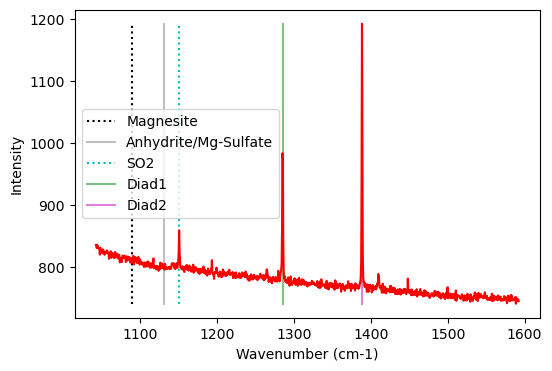

In [20]:
pf.plot_diad(path=spectra_path, filename=filename, filetype=filetype)

## After inspecting the spectra, decide if you want to fit any secondary peaks (e.g., carbonate, SO2 etc)
- First, look at the presets, you can edit them in generic_peak_config by typing the variable name, and a new value

In [21]:
# Decide if you want to fit a carbonate peak or not here. 
fit_carbonate=True

# Tweak options here, can exclude a range for example using exclude_range=Tuple[float, float]
generic_Config=pf.generic_peak_config(lower_bck=(1110, 1130), upper_bck=(1160, 1180),
                                cent_generic=1150, name='SO2')
generic_Config   

generic_peak_config(name='SO2', lower_bck=(1110, 1130), upper_bck=(1160, 1180), N_poly_carb_bck=1, amplitude=1000, cent_generic=1150, outlier_sigma=12, N_peaks=3, distance=10, prominence=5, width=6, threshold=0.1, exclude_range=None, dpi=100, plot_figure=True, return_other_params=False)

## This actually does the work fitting the carbonate peak

Peak_Cent_SO2  Peak_Area_SO2  Peak_Height_SO2
0    1150.771368      86.866292        59.925067

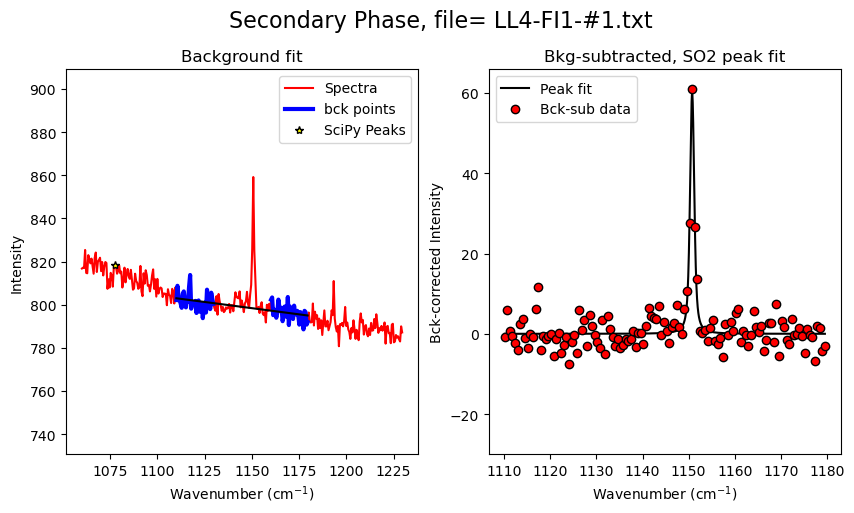

In [22]:
generic_fit=pf.fit_generic_peak(config=generic_Config, path=spectra_path, 
filename=filename, filetype=filetype)
generic_fit

## Now lets plot the diads
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

In [23]:
diad_id_config=pf.diad_id_config(height=50)
diad_id_config

diad_id_config(exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1295), height=50, distance=5, threshold=0.5, width=0.5, prominence=10, plot_figure=True)

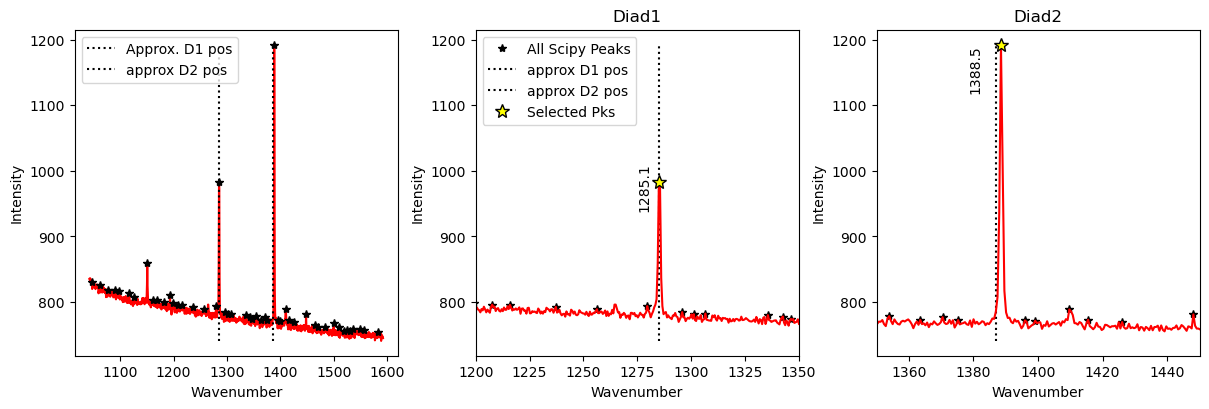

In [24]:
# Specify the number of peaks, 1 = just peak, 2 = Peak+hot bands
n_peaks_diad1=1
n_peaks_diad2=1 

    
diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config, path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2)

In [25]:
diad2_peaks

(1388.502824,)

## If you have no diads visible...
- change True to False, and it will just save the carbonate peak parameters

In [26]:
diads_present=True
pf.proceed_to_fit_diads(filename, generic_fit, diads_present=diads_present)

Move on to fit diads


## Fit Diad 1
- This function uses the guess of the peak parameters above. 
- For very dense diads, you may need to fit a gaussian background, defined by peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000
- Otherwise, the background is fitted with a polynomial you can set the degree for (Default =1) based on background positoins defined by lower_bck, upper_bck...
- If plot_figure=True, it saves the figure in its own folder in the path, so you can inspect all the fits at a later date. 

In [27]:
diad1_fit_config=pf.diad1_fit_config(x_range_residual=10, x_range_baseline=10,
                                    HB_amplitude=5, diad_amplitude=1000)
diad1_fit_config

diad1_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1300, 1350), diad_amplitude=1000, HB_amplitude=5, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  \
0          1285.318872       1285.318872        361.565817           0.319542   

   Diad1_Voigt_Gamma  Diad1_Combofit_Height  Residual_Diad1  
0           0.319542             236.157502        3.052371

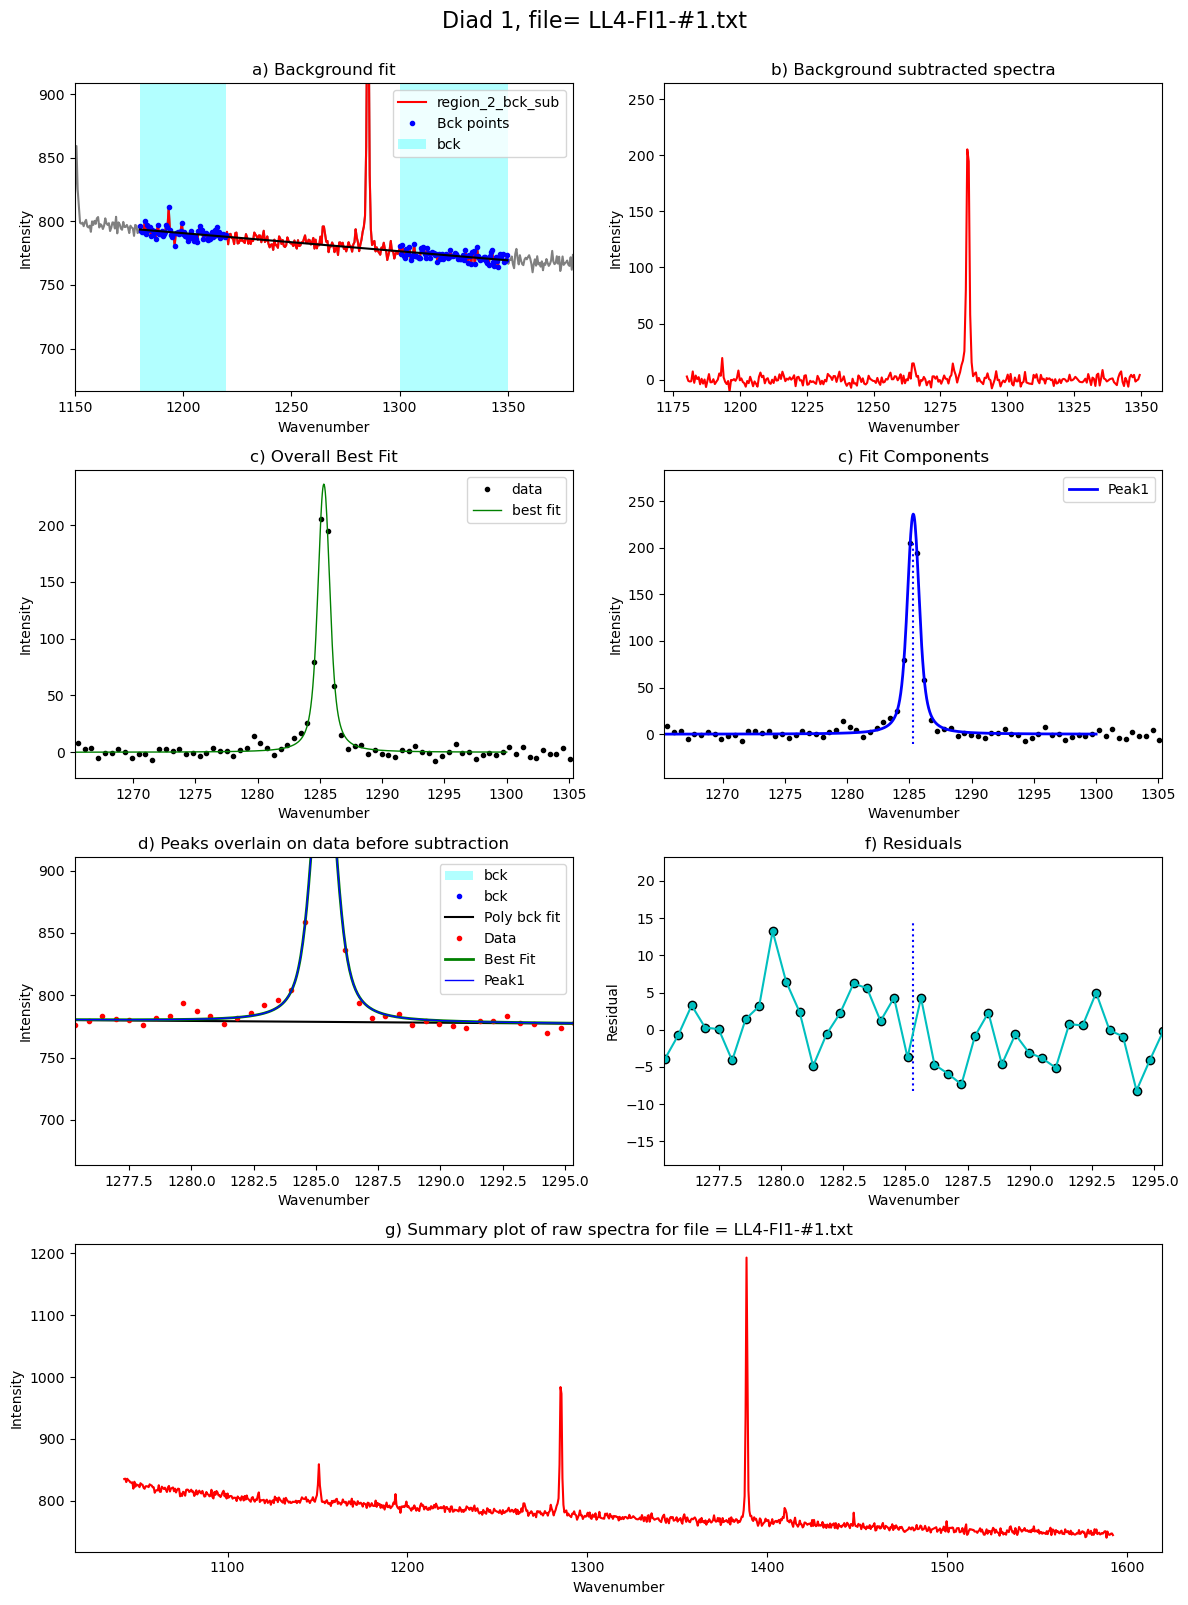

In [28]:
# For very dense spectra, with a very elevated background, you'll need to add a gaussian fit
# If you put a number in brackets, it'll center a gaussian extra background near there. 


# This function does the work fitting the diad
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)
Diad1_fit

## Fit diad 2

In [29]:
# diad2_fit_config=pf.diad2_fit_config(x_range_residual=10, HB_amplitude=100,
#                                      x_range_baseline=10,
#                                     diad_amplitude=1000)
# diad2_fit_config

diad2_fit_config=pf.diad2_fit_config(x_range_residual=10, diad_amplitude=1000, x_range_baseline=10)
diad2_fit_config

diad2_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad2=1, lower_bck_diad2=(1300, 1360), upper_bck_diad2=(1440, 1470), diad_amplitude=1000, HB_amplitude=20, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_Voigt_Area  Diad2_Voigt_Sigma  \
0          1388.574984       1388.574984        576.556547           0.276415   

   Diad2_Voigt_Gamma  Diad2_Combofit_Height  Residual_Diad2  
0           0.276415             435.333987        3.421127

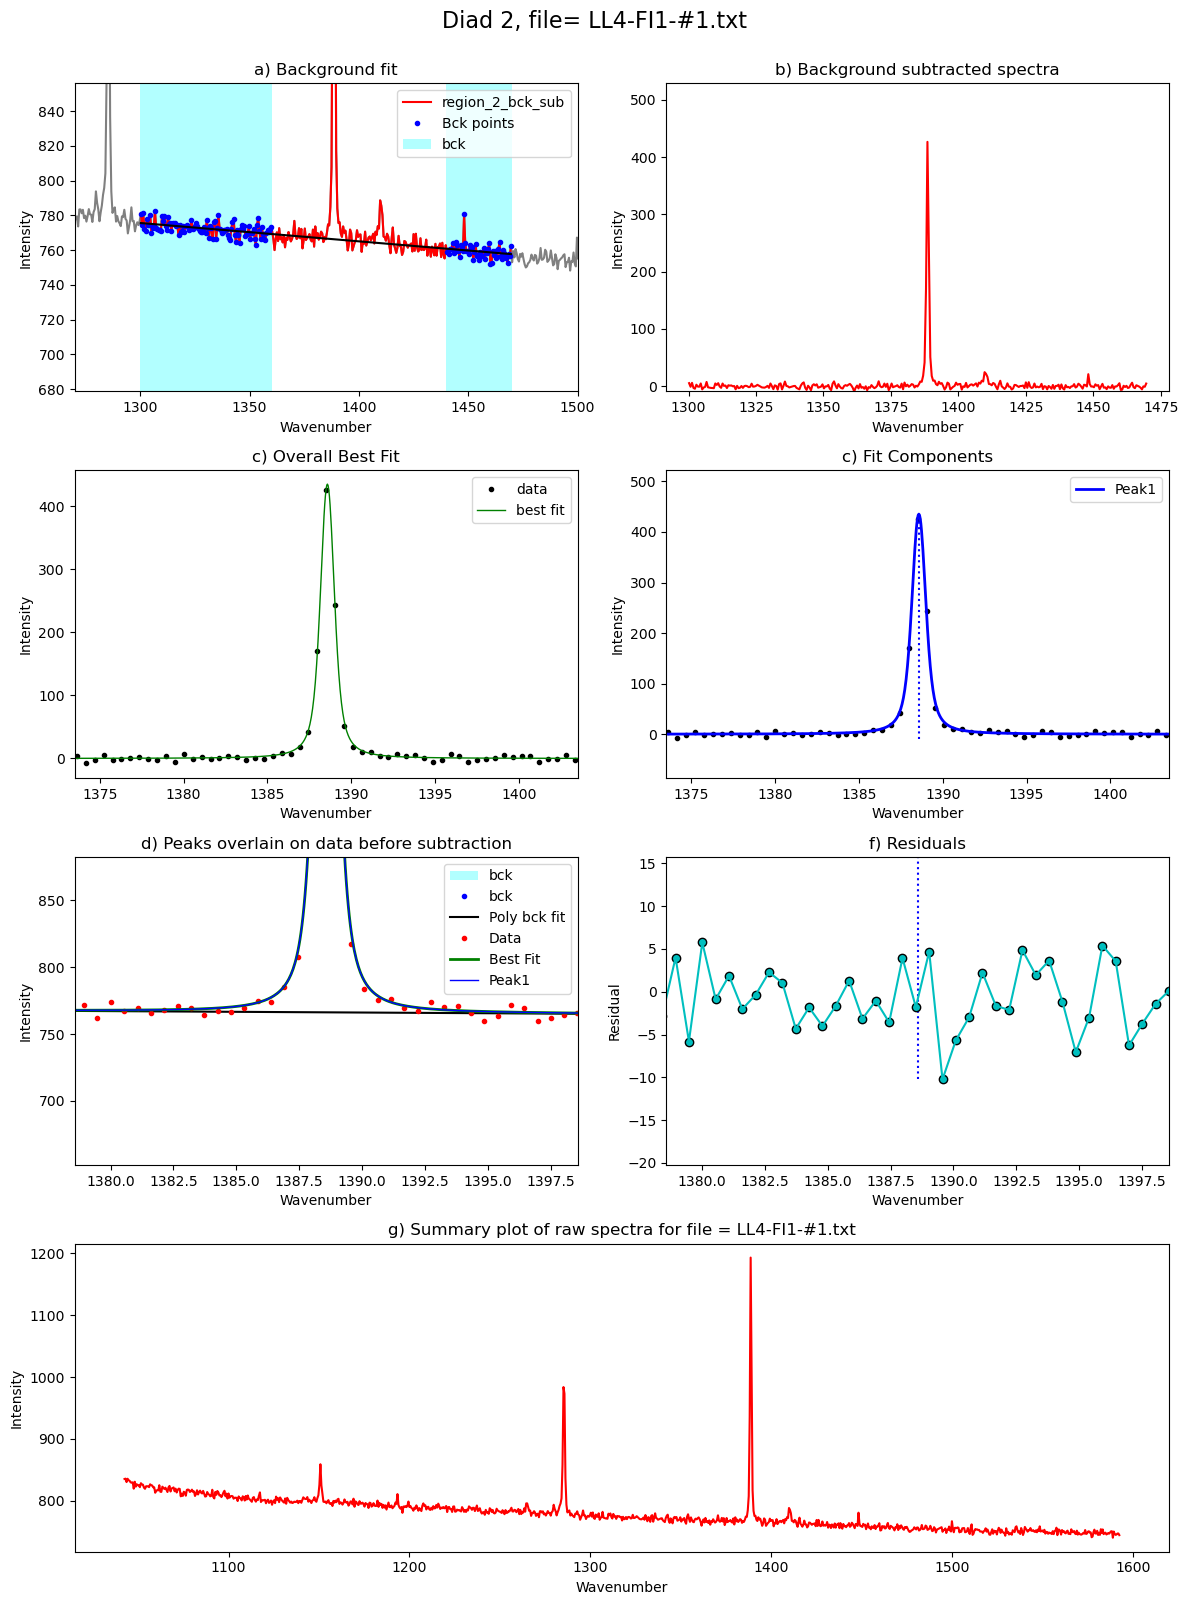

In [30]:
# Do you want to save the figure?
# This function does the work fitting the diad
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad2_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)
Diad2_fit

## Combine and save
- Saves to clipboard if to_clipboard=True (e.g. you can paste into a spreadsheet)
- Also saves to 'csv' in a folder in "spectra_path" if to_csv=True)
- It also makes a new 

In [31]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, to_clipboard=True, to_csv=True, path=spectra_path,
Diad2_fit=Diad2_fit, Carb_fit=generic_fit)
out

filename   Splitting  Diad1_Combofit_Cent  Diad1_Combofit_Height  \
0  LL4-FI1-#1  103.256112          1285.318872             236.157502   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  \
0       1285.318872        361.565817           0.319542           0.319542   

   Residual_Diad1  Diad2_Combofit_Cent  ...  Diad2_Voigt_Cent  \
0        3.052371          1388.574984  ...       1388.574984   

   Diad2_Voigt_Area  Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Residual_Diad2  \
0        576.556547           0.276415           0.276415        3.421127   

   HB1_Cent  HB1_Area  Peak_Cent_SO2  Peak_Area_SO2  Peak_Height_SO2  
0       NaN         0    1150.771368      86.866292        59.925067  

[1 rows x 21 columns]

In [32]:
out

filename   Splitting  Diad1_Combofit_Cent  Diad1_Combofit_Height  \
0  LL4-FI1-#1  103.256112          1285.318872             236.157502   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  \
0       1285.318872        361.565817           0.319542           0.319542   

   Residual_Diad1  Diad2_Combofit_Cent  ...  Diad2_Voigt_Cent  \
0        3.052371          1388.574984  ...       1388.574984   

   Diad2_Voigt_Area  Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Residual_Diad2  \
0        576.556547           0.276415           0.276415        3.421127   

   HB1_Cent  HB1_Area  Peak_Cent_SO2  Peak_Area_SO2  Peak_Height_SO2  
0       NaN         0    1150.771368      86.866292        59.925067  

[1 rows x 21 columns]

## You can also try looping if all your spectra are pretty similar

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:17<00:00,  2.95s/it]


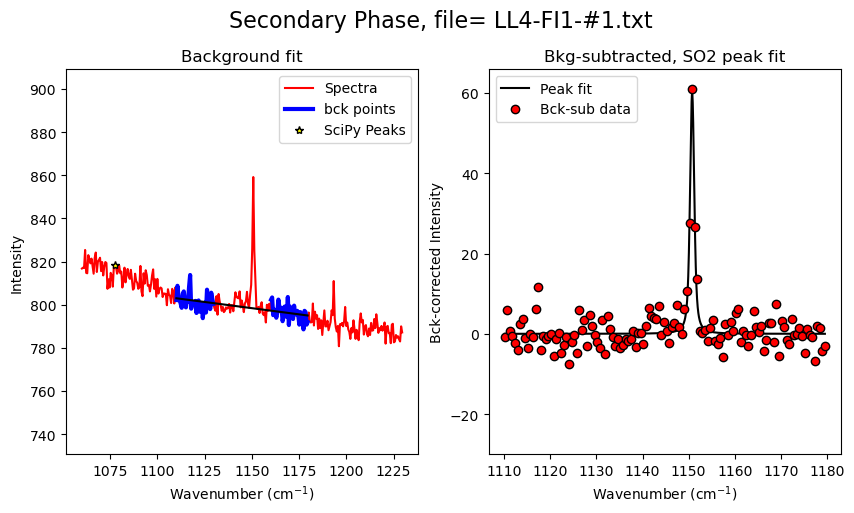

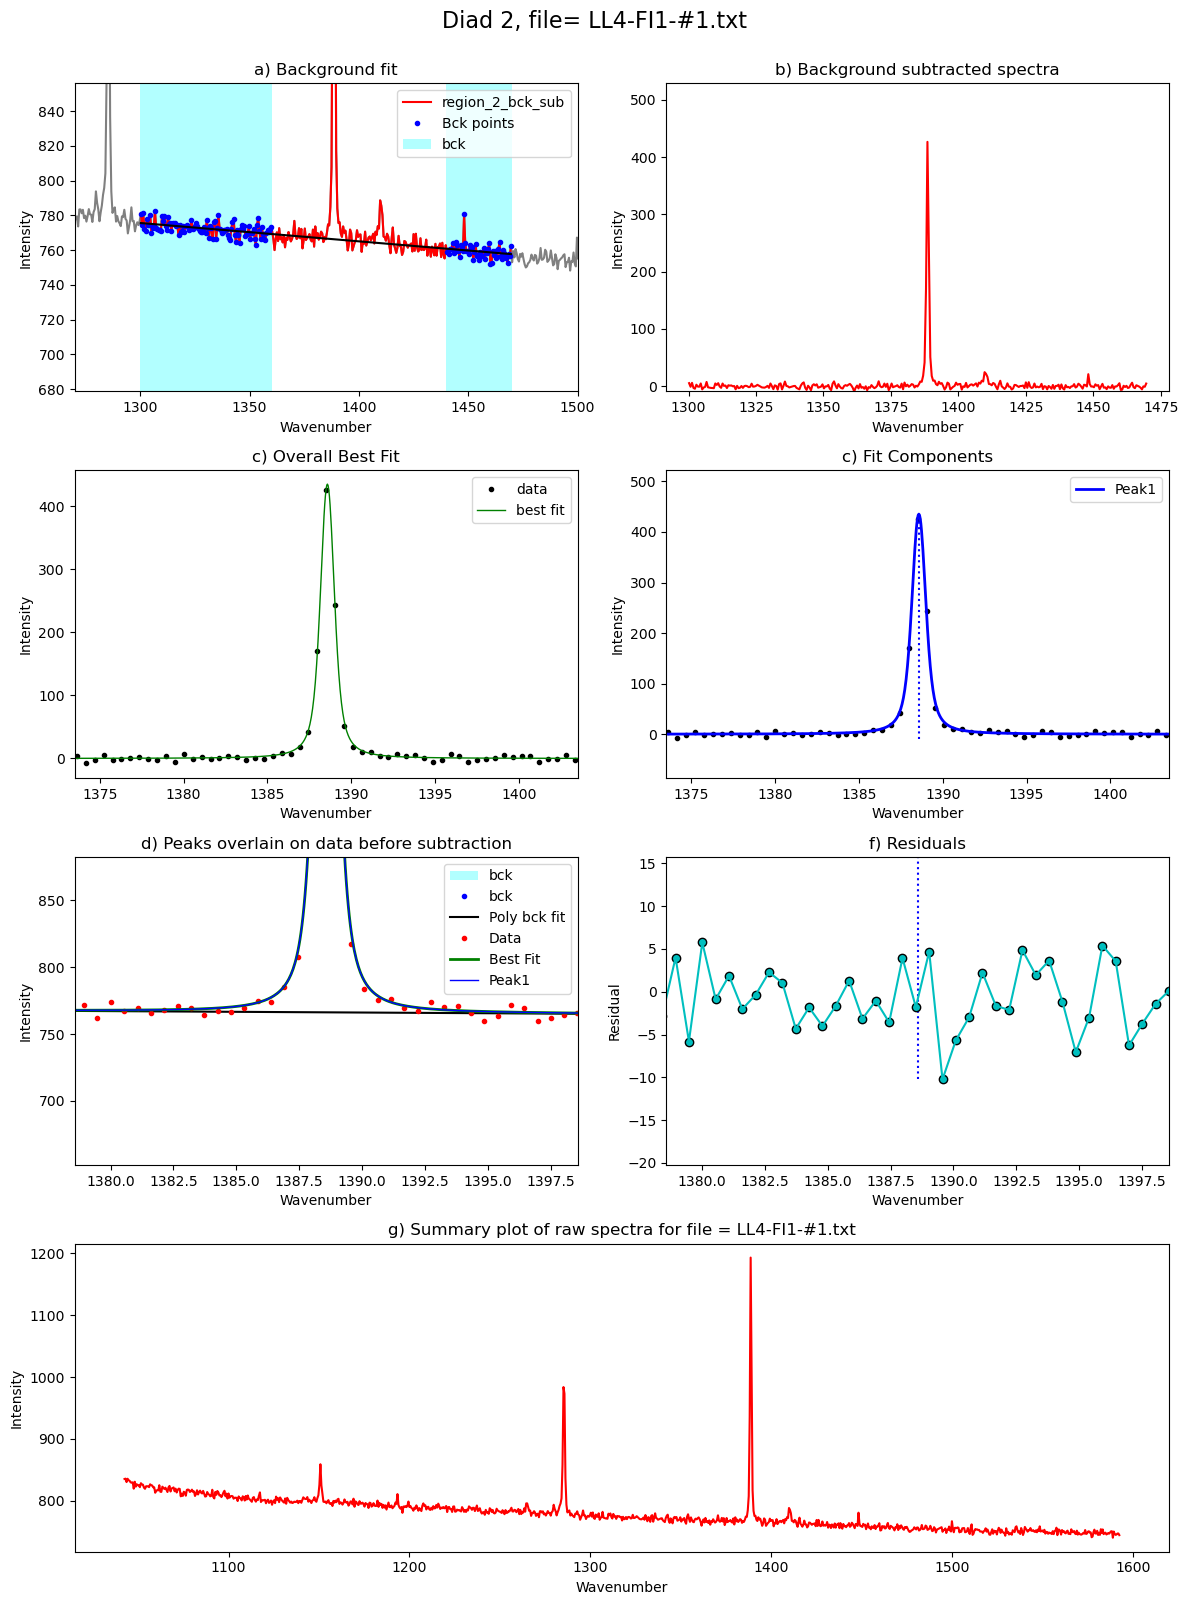

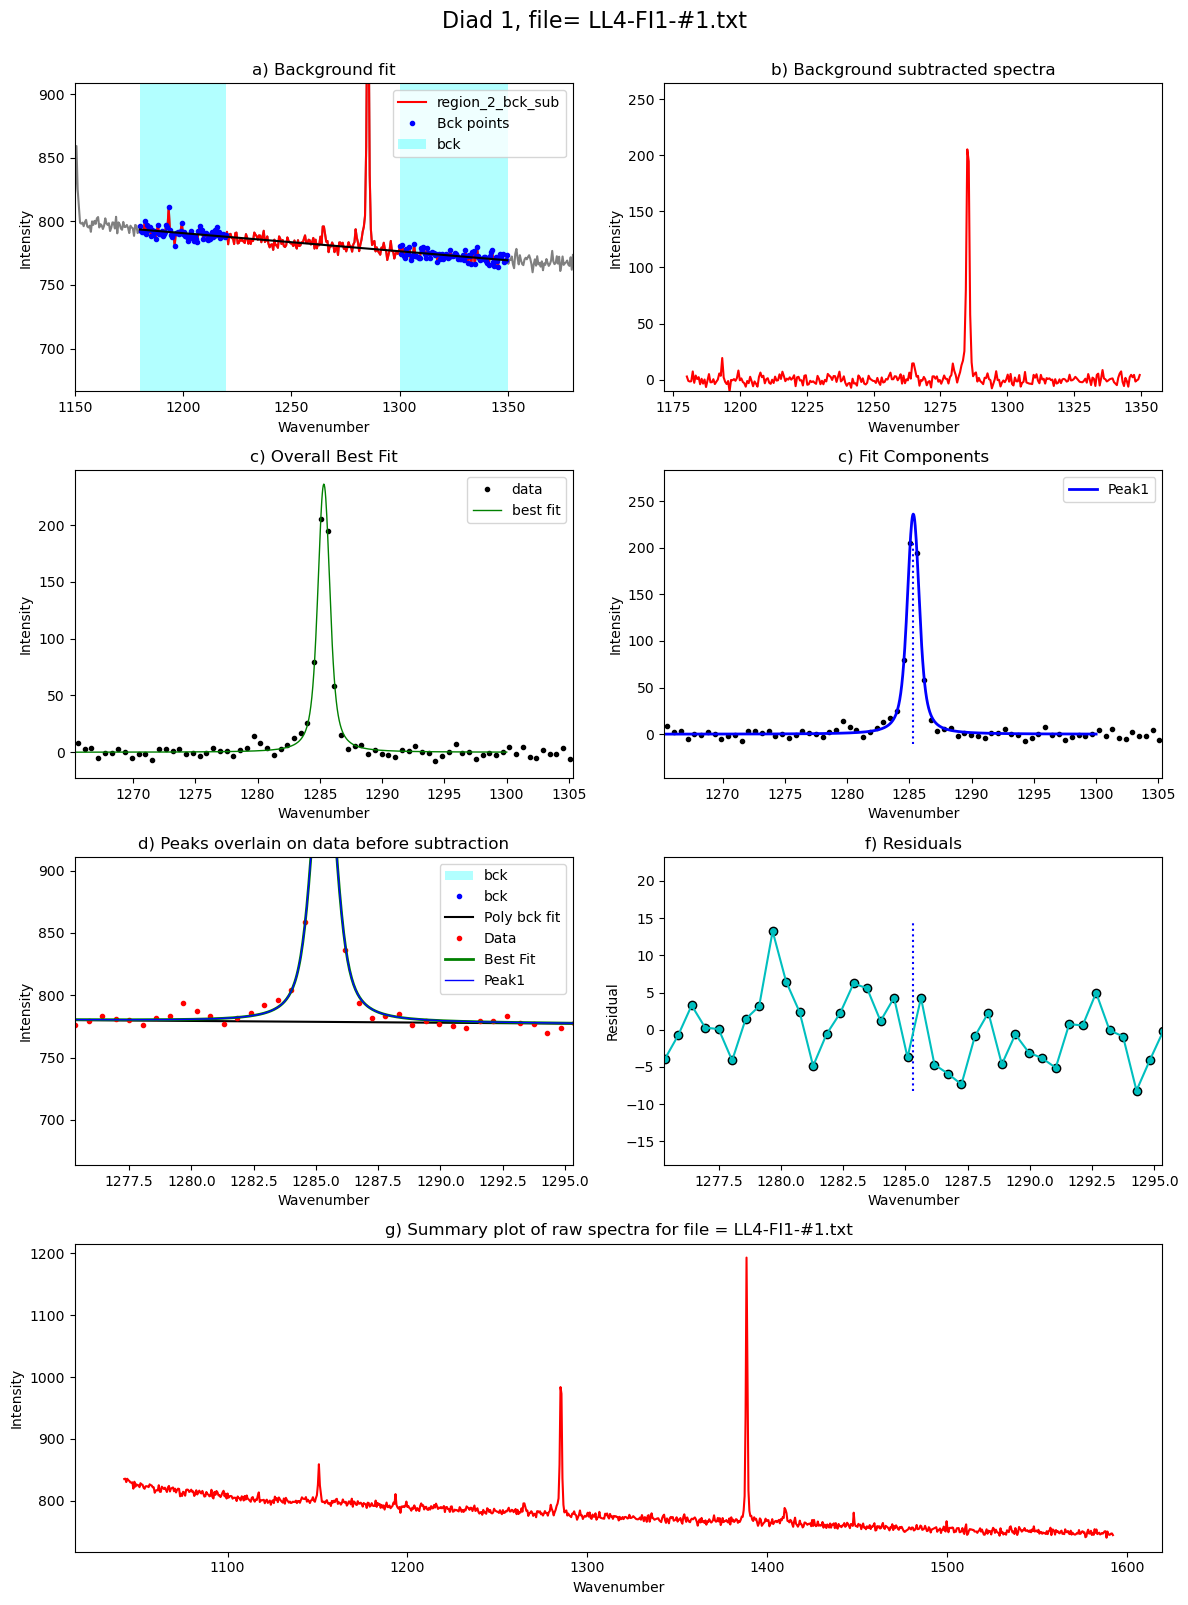

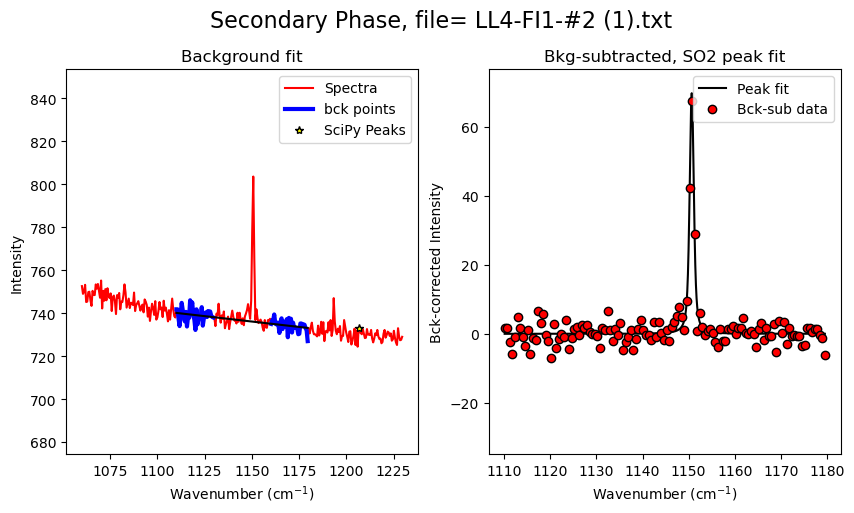

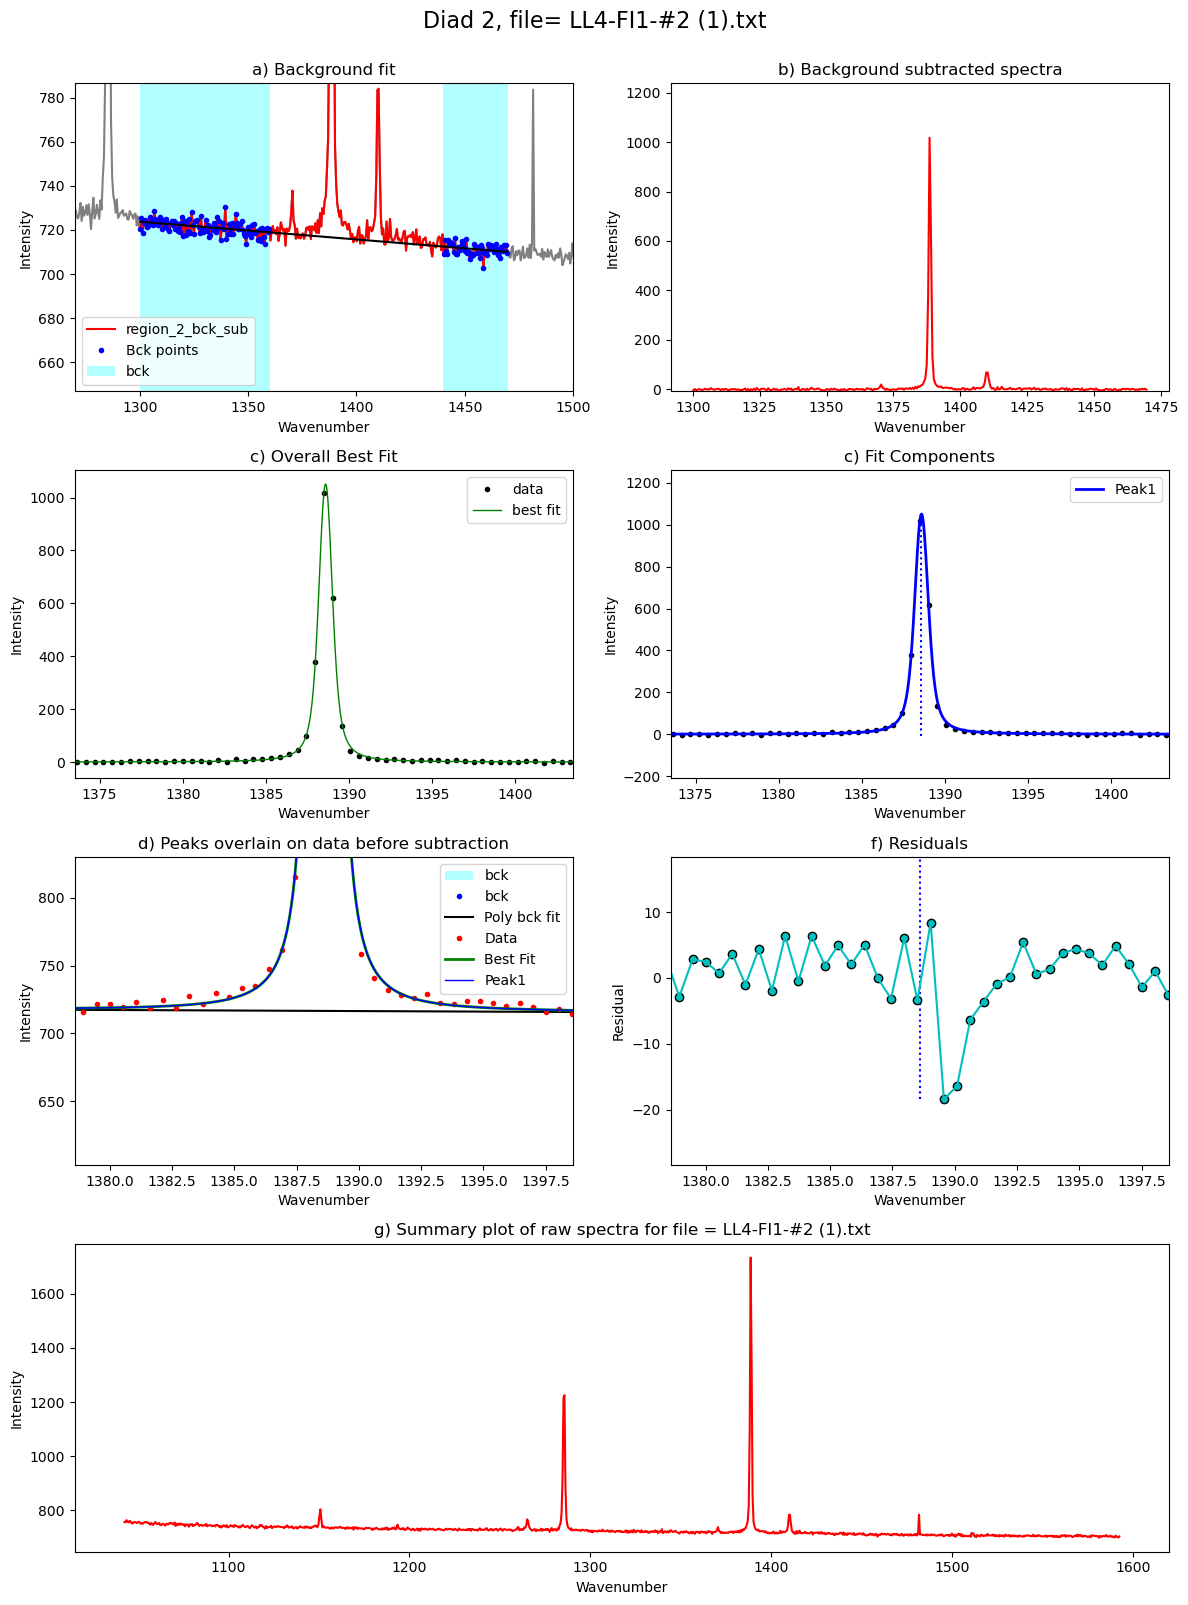

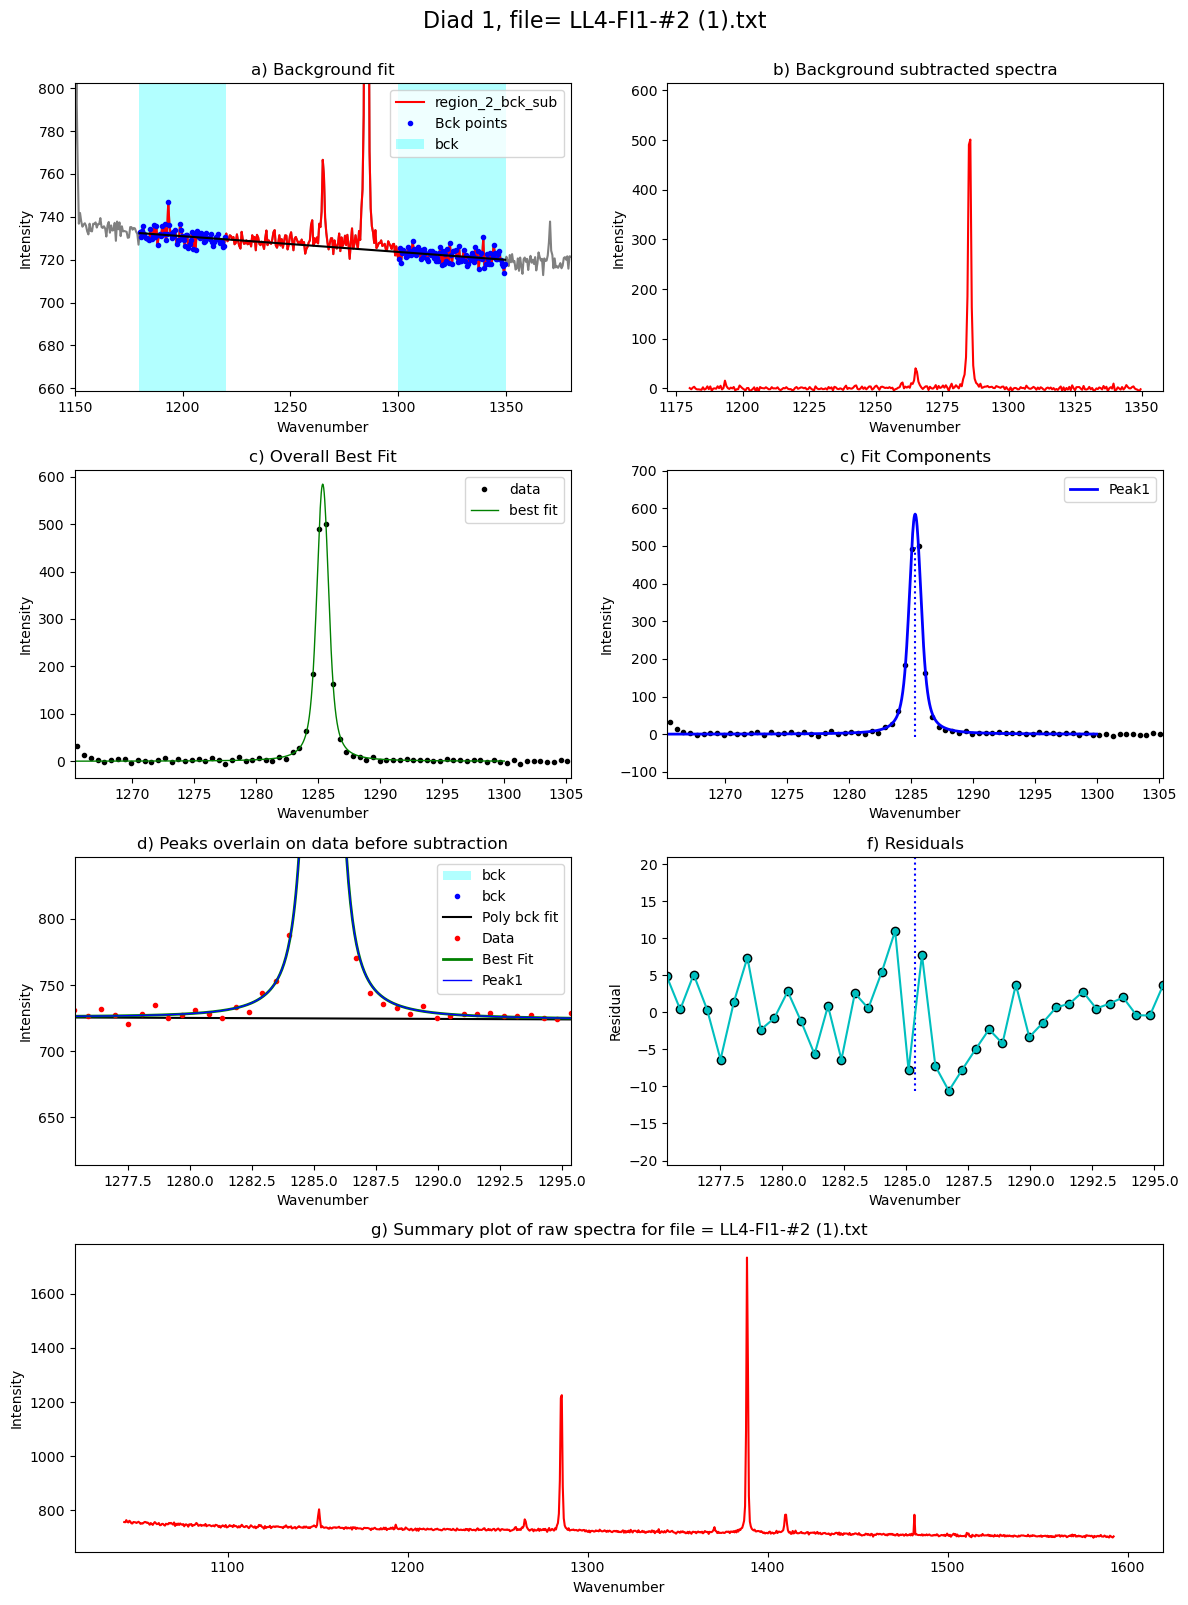

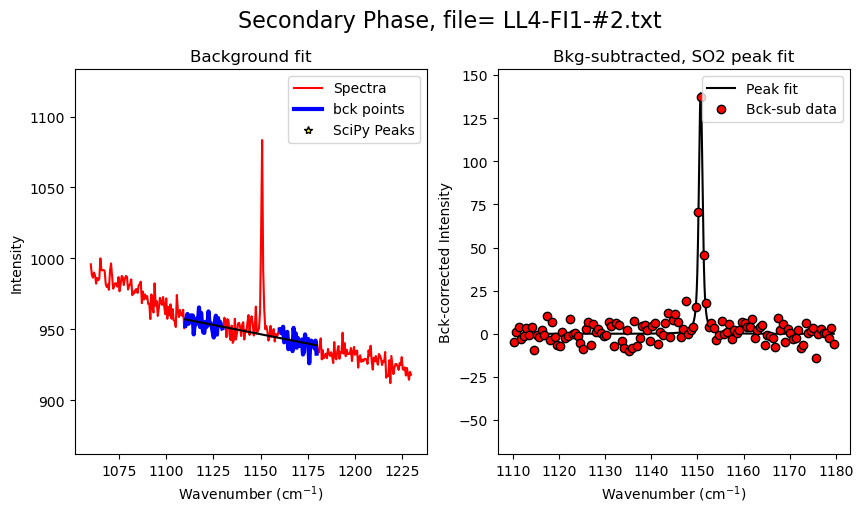

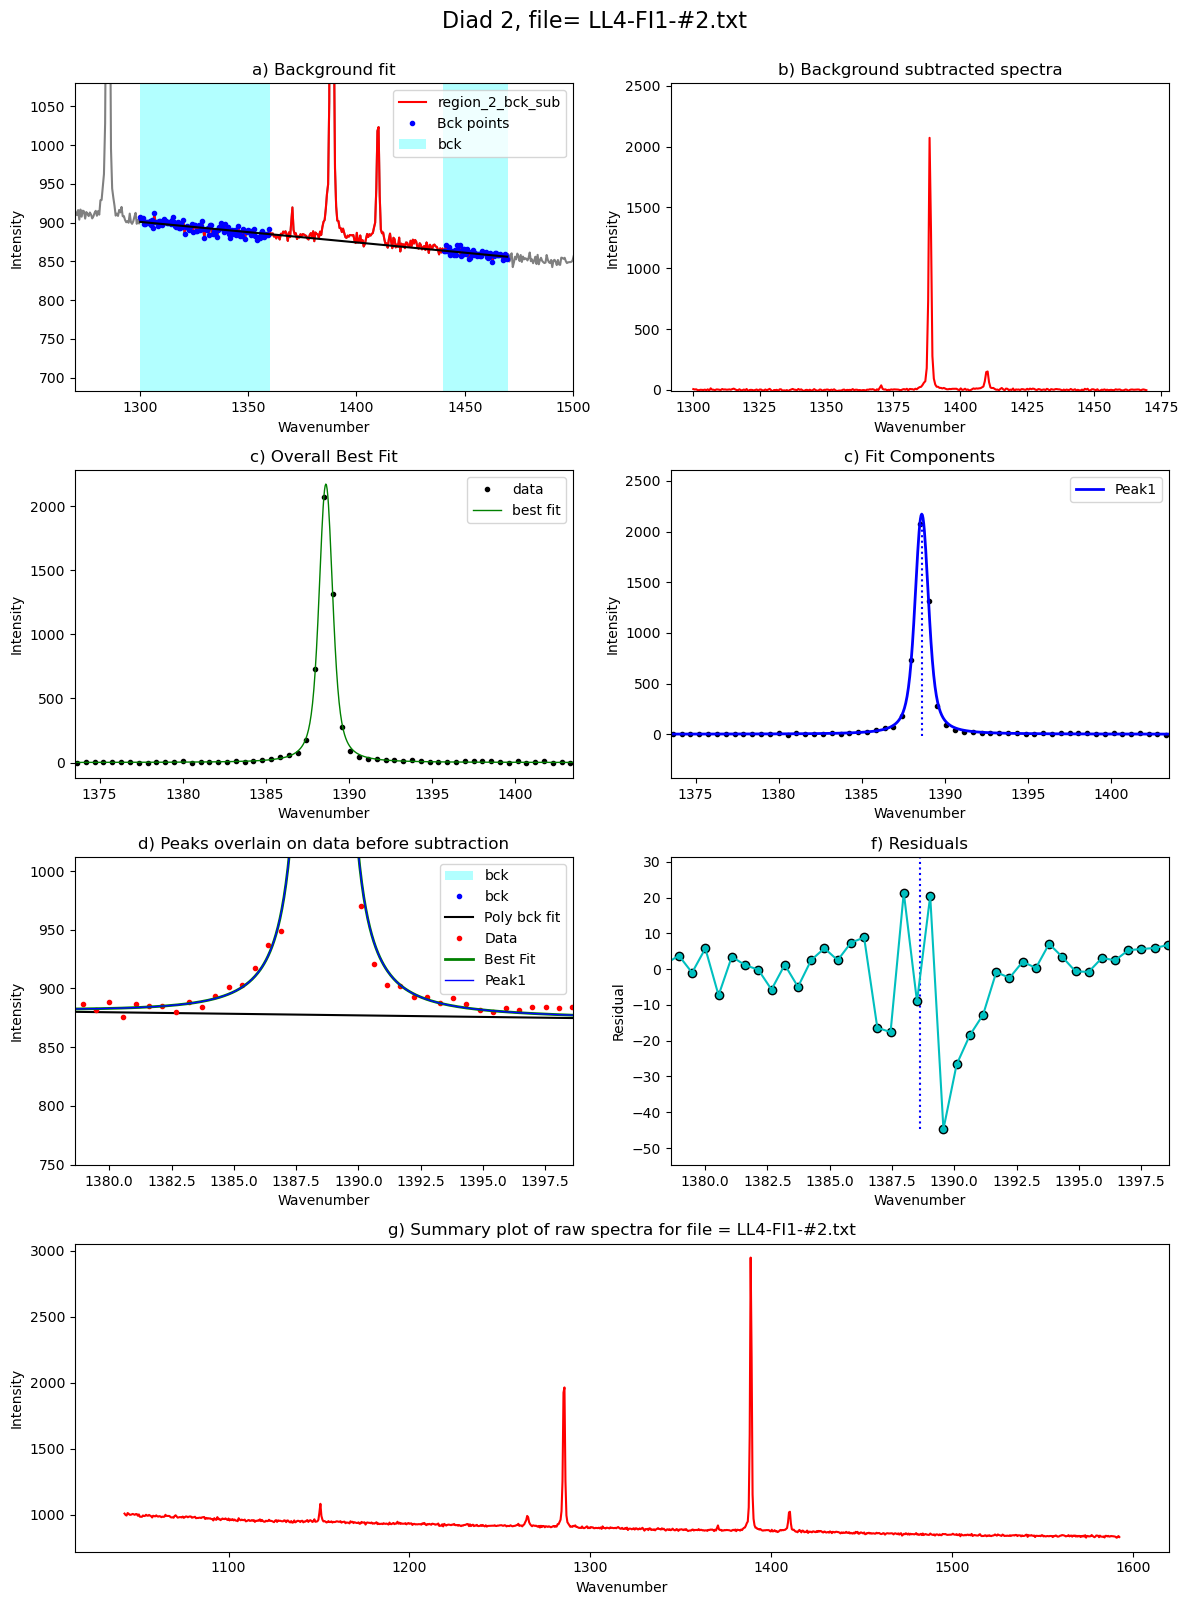

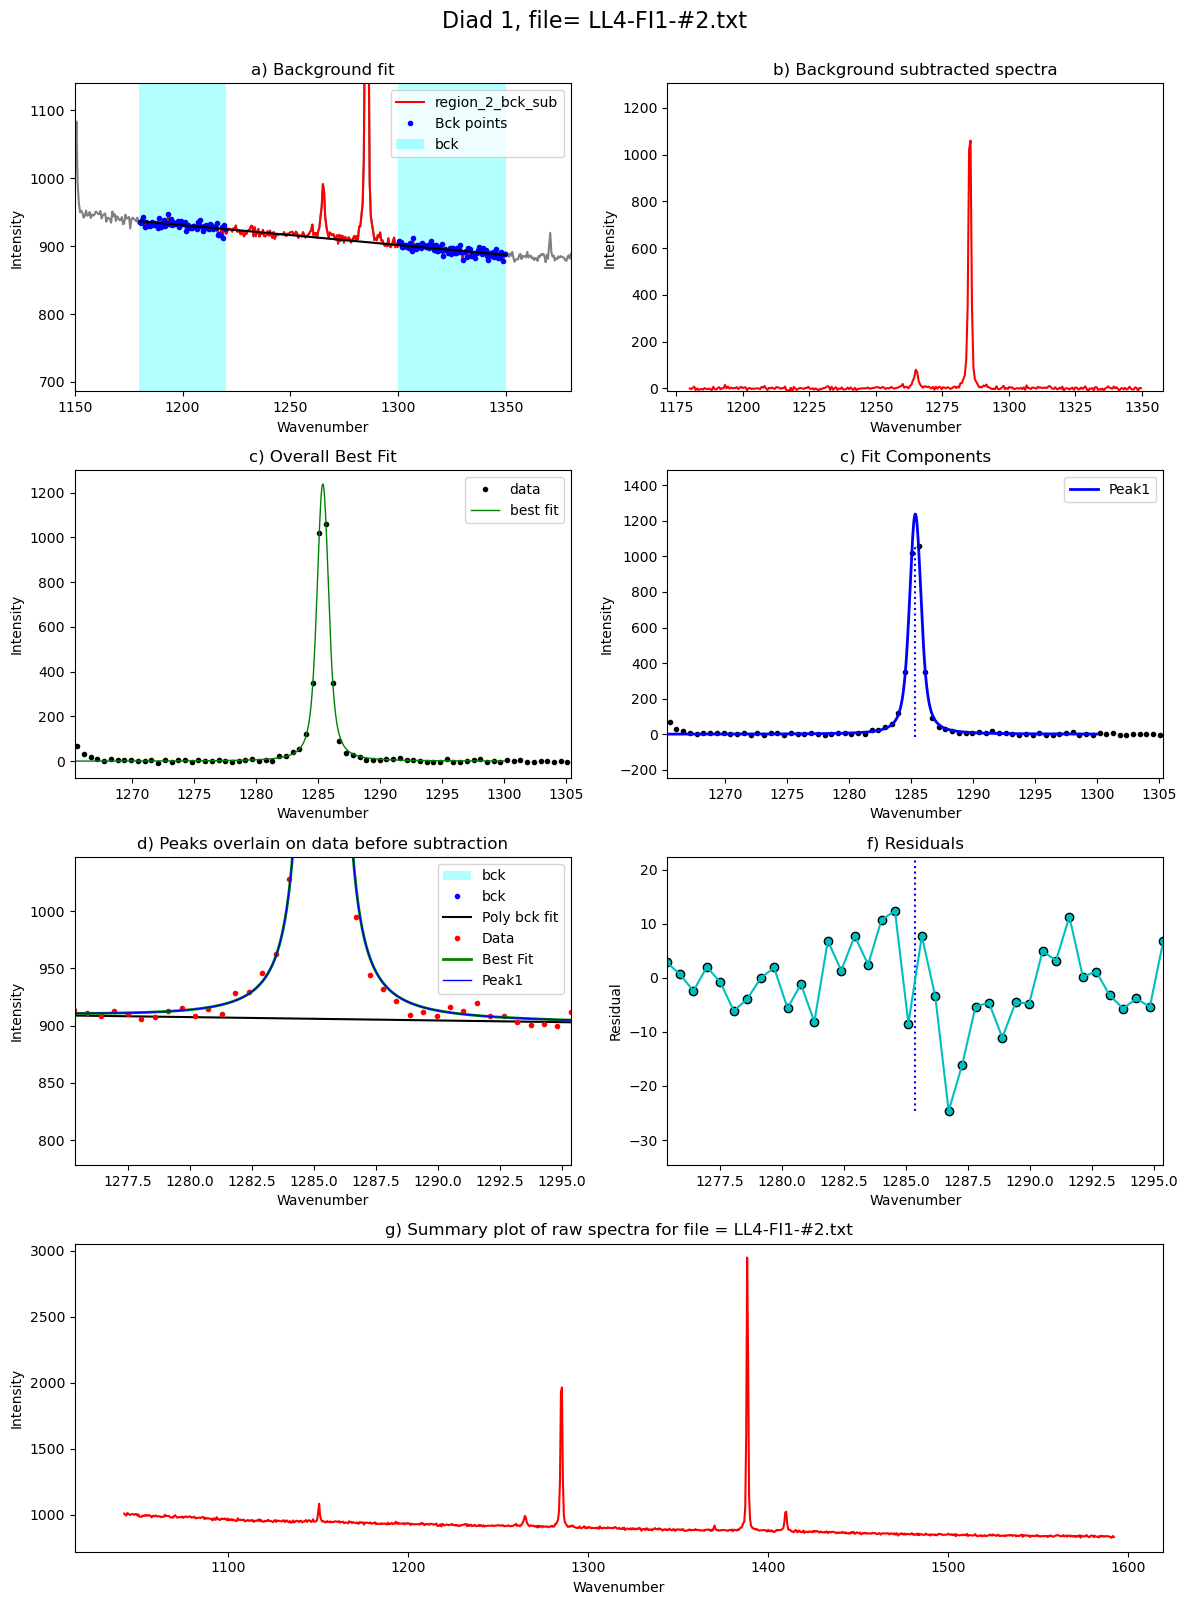

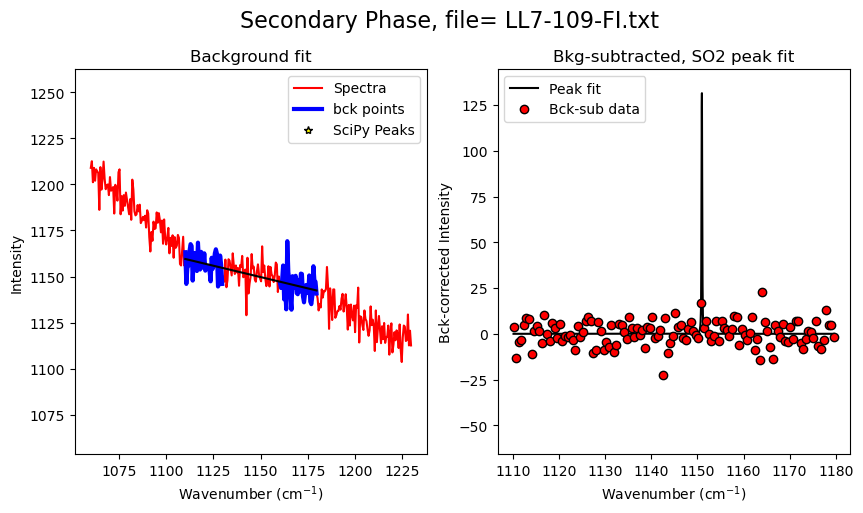

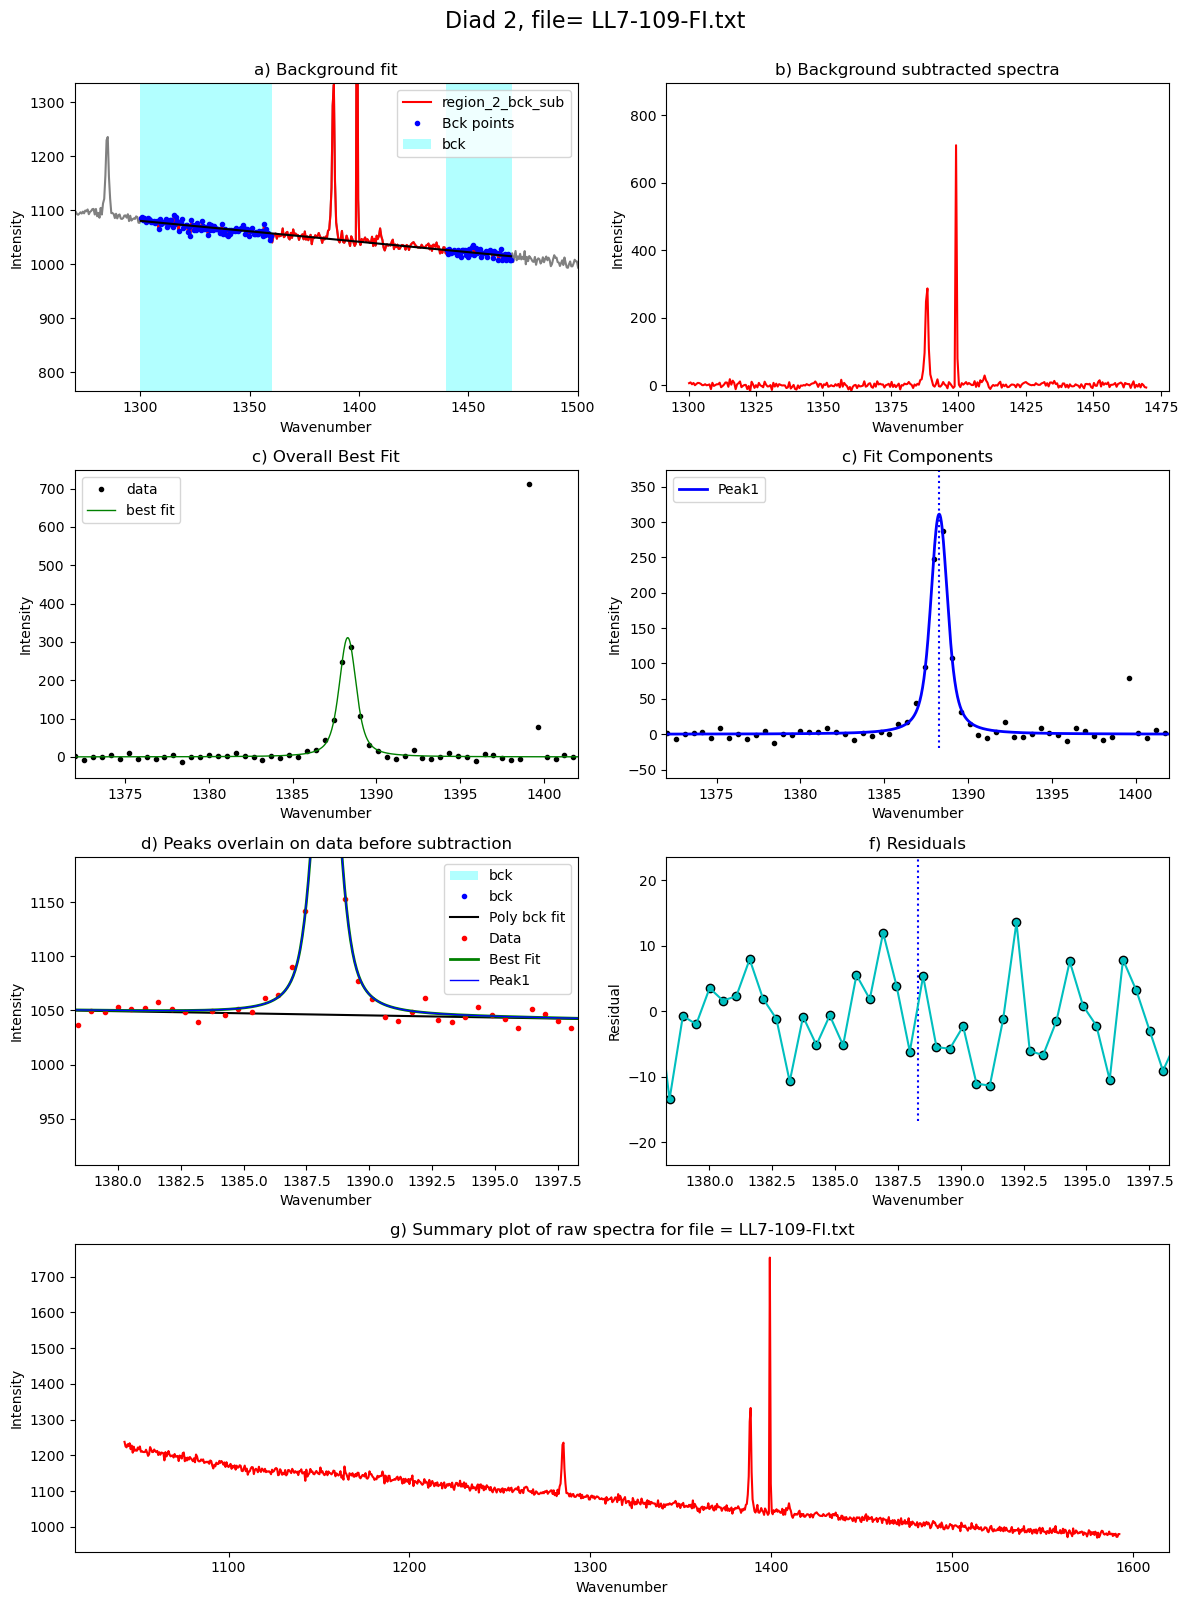

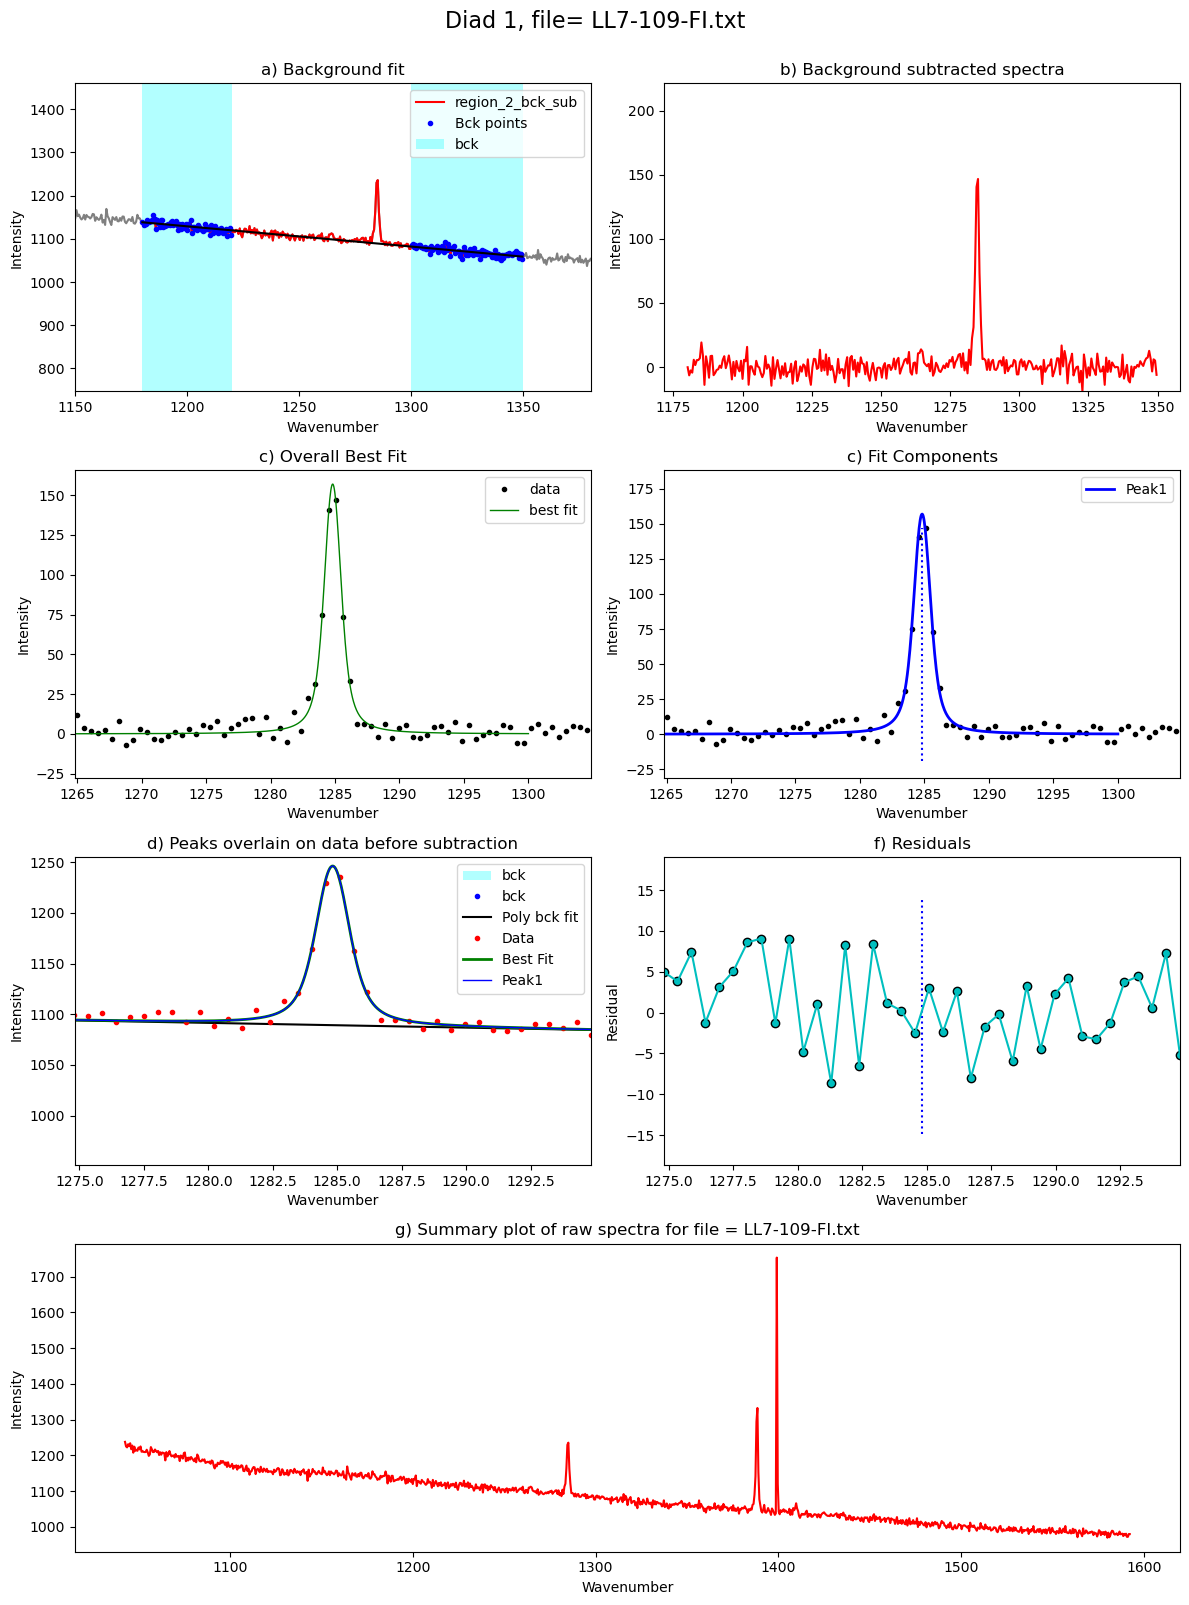

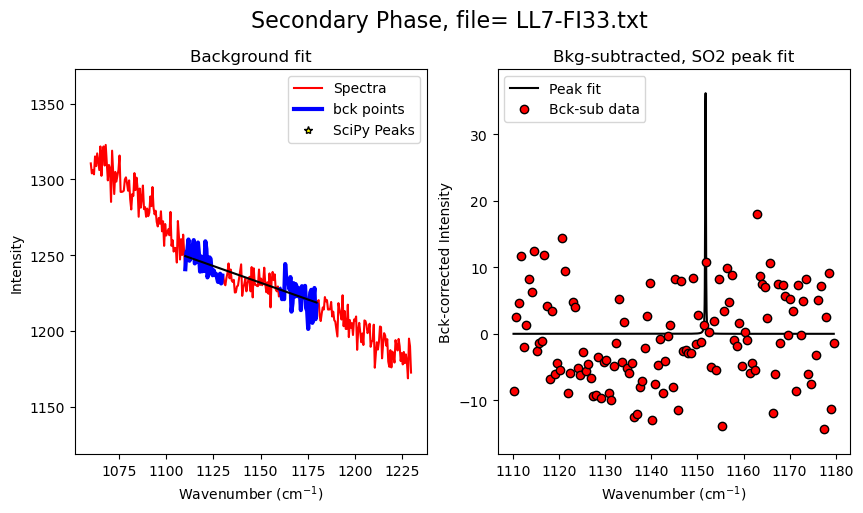

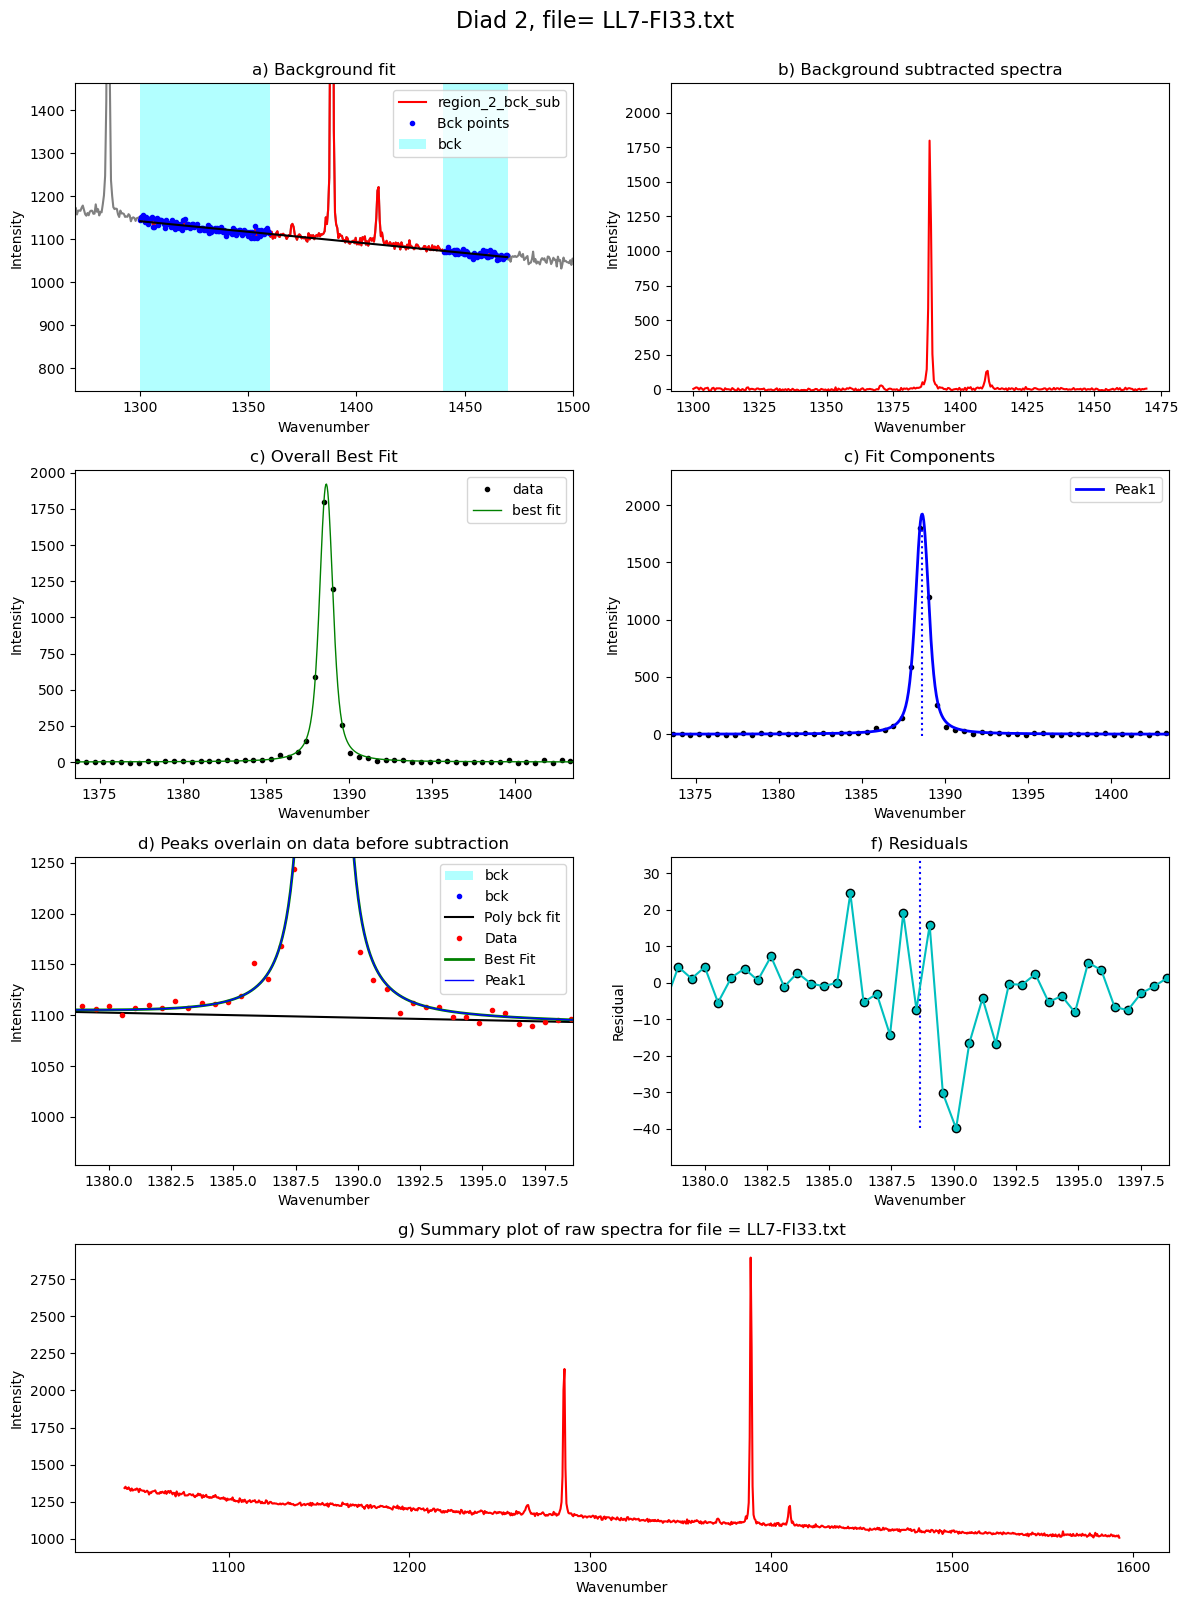

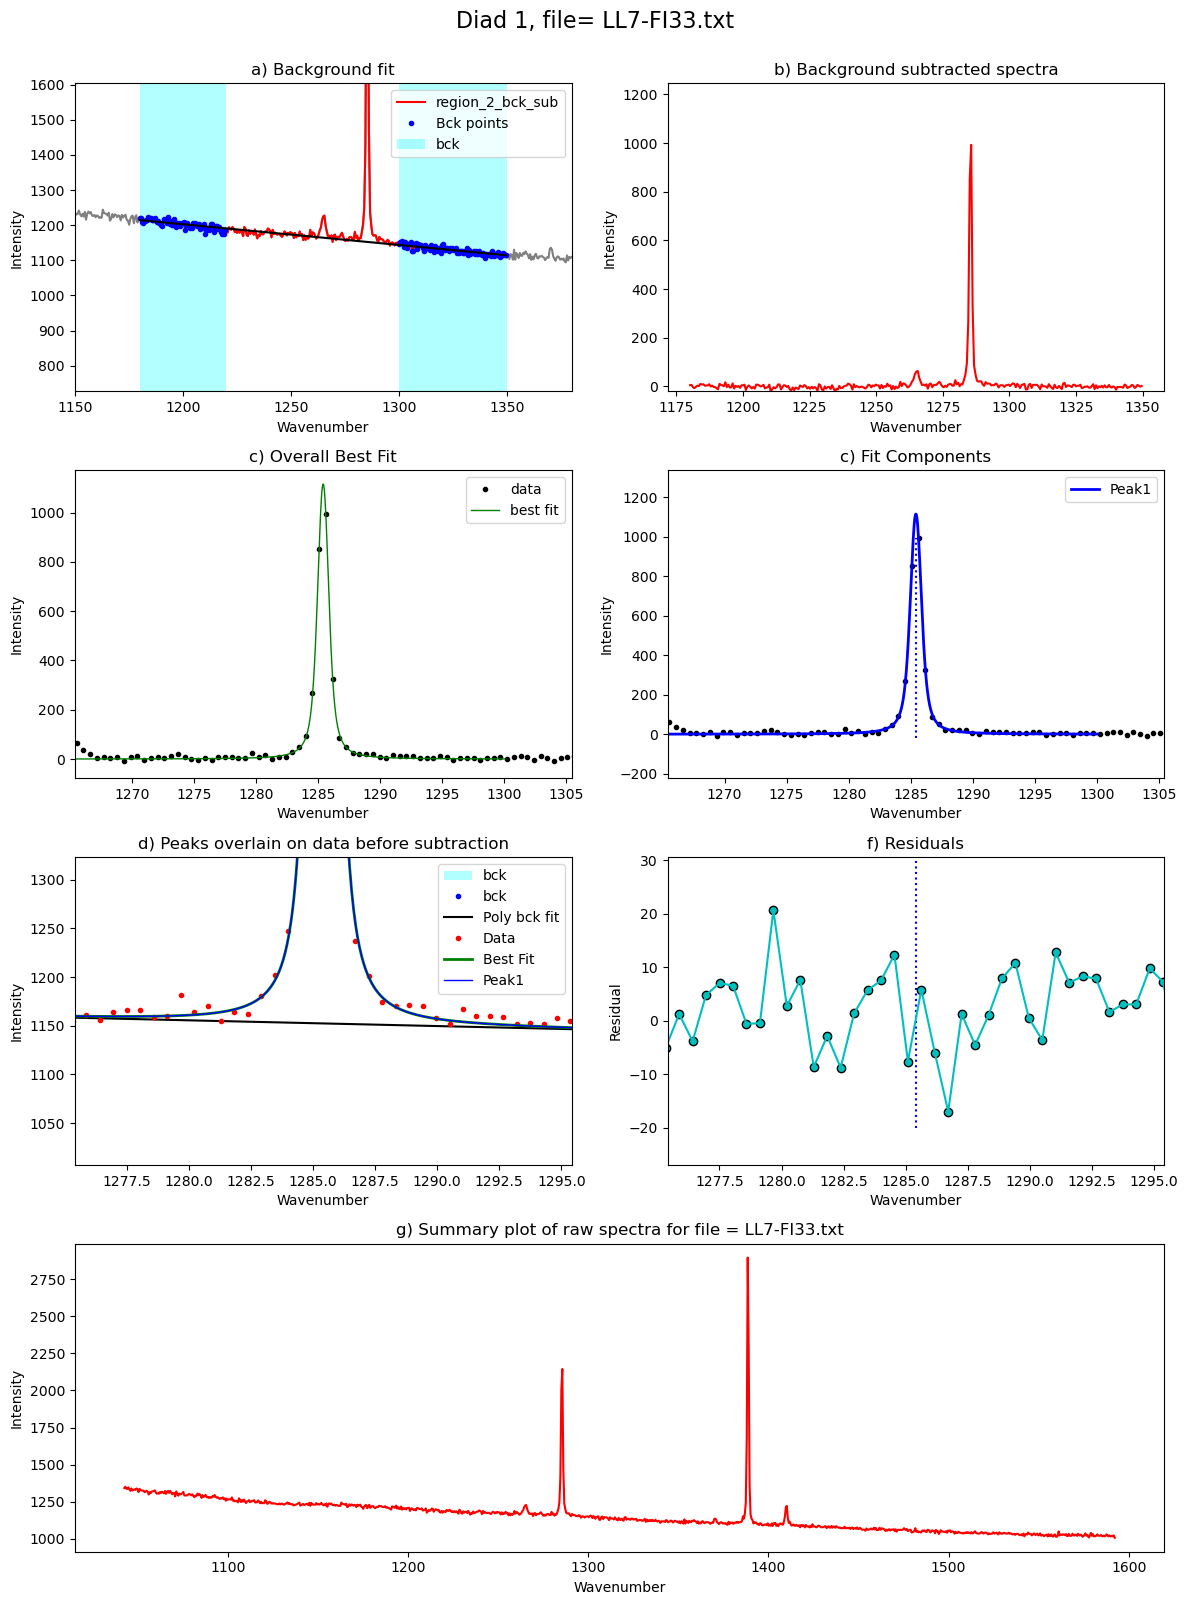

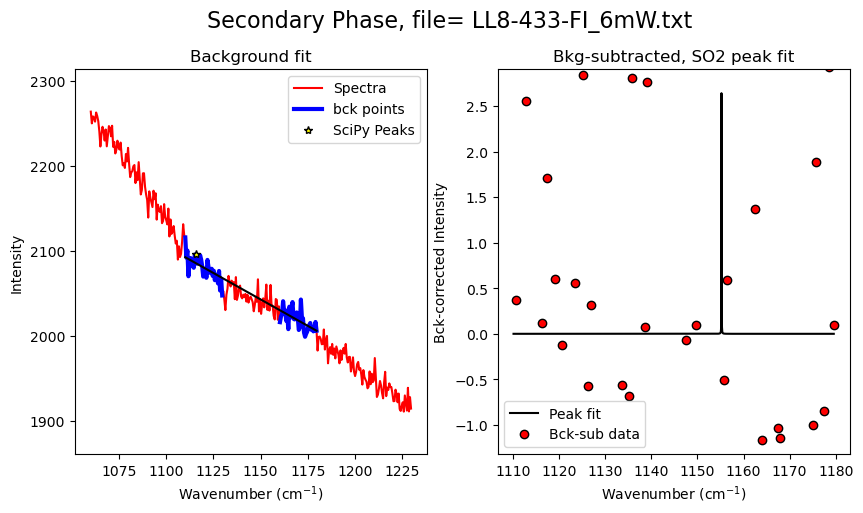

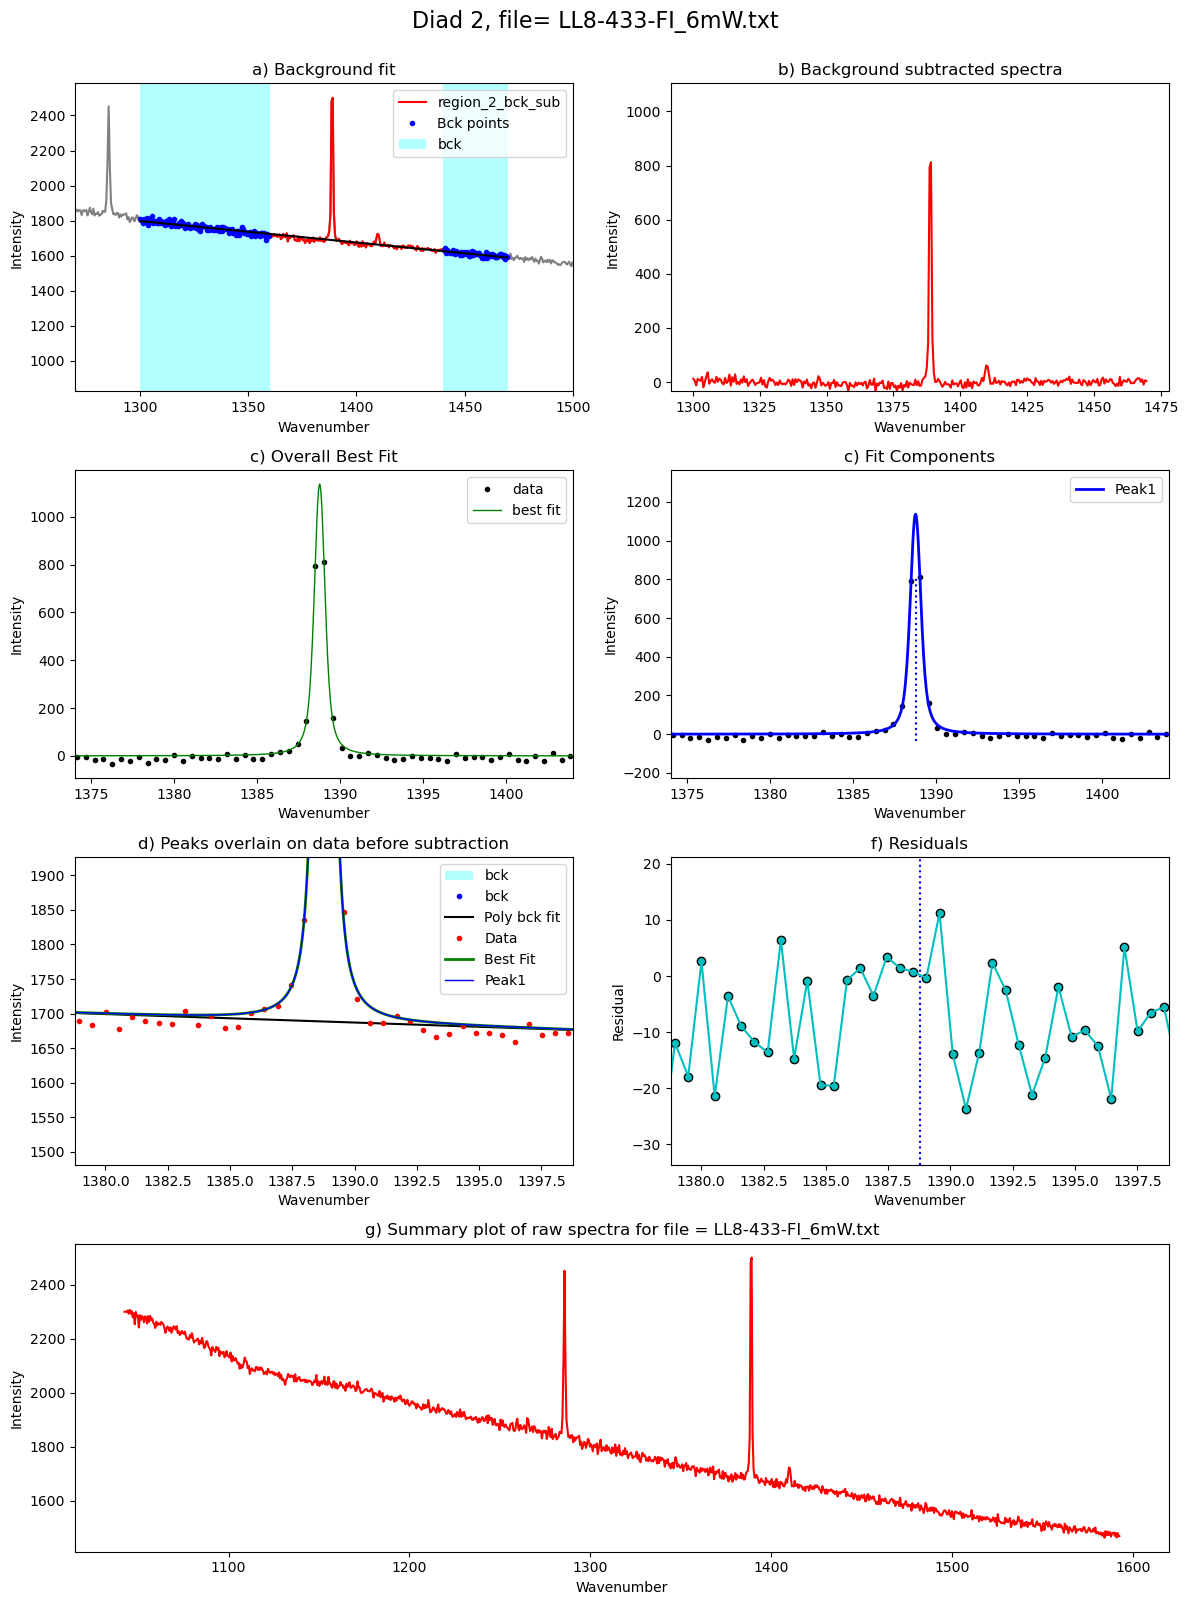

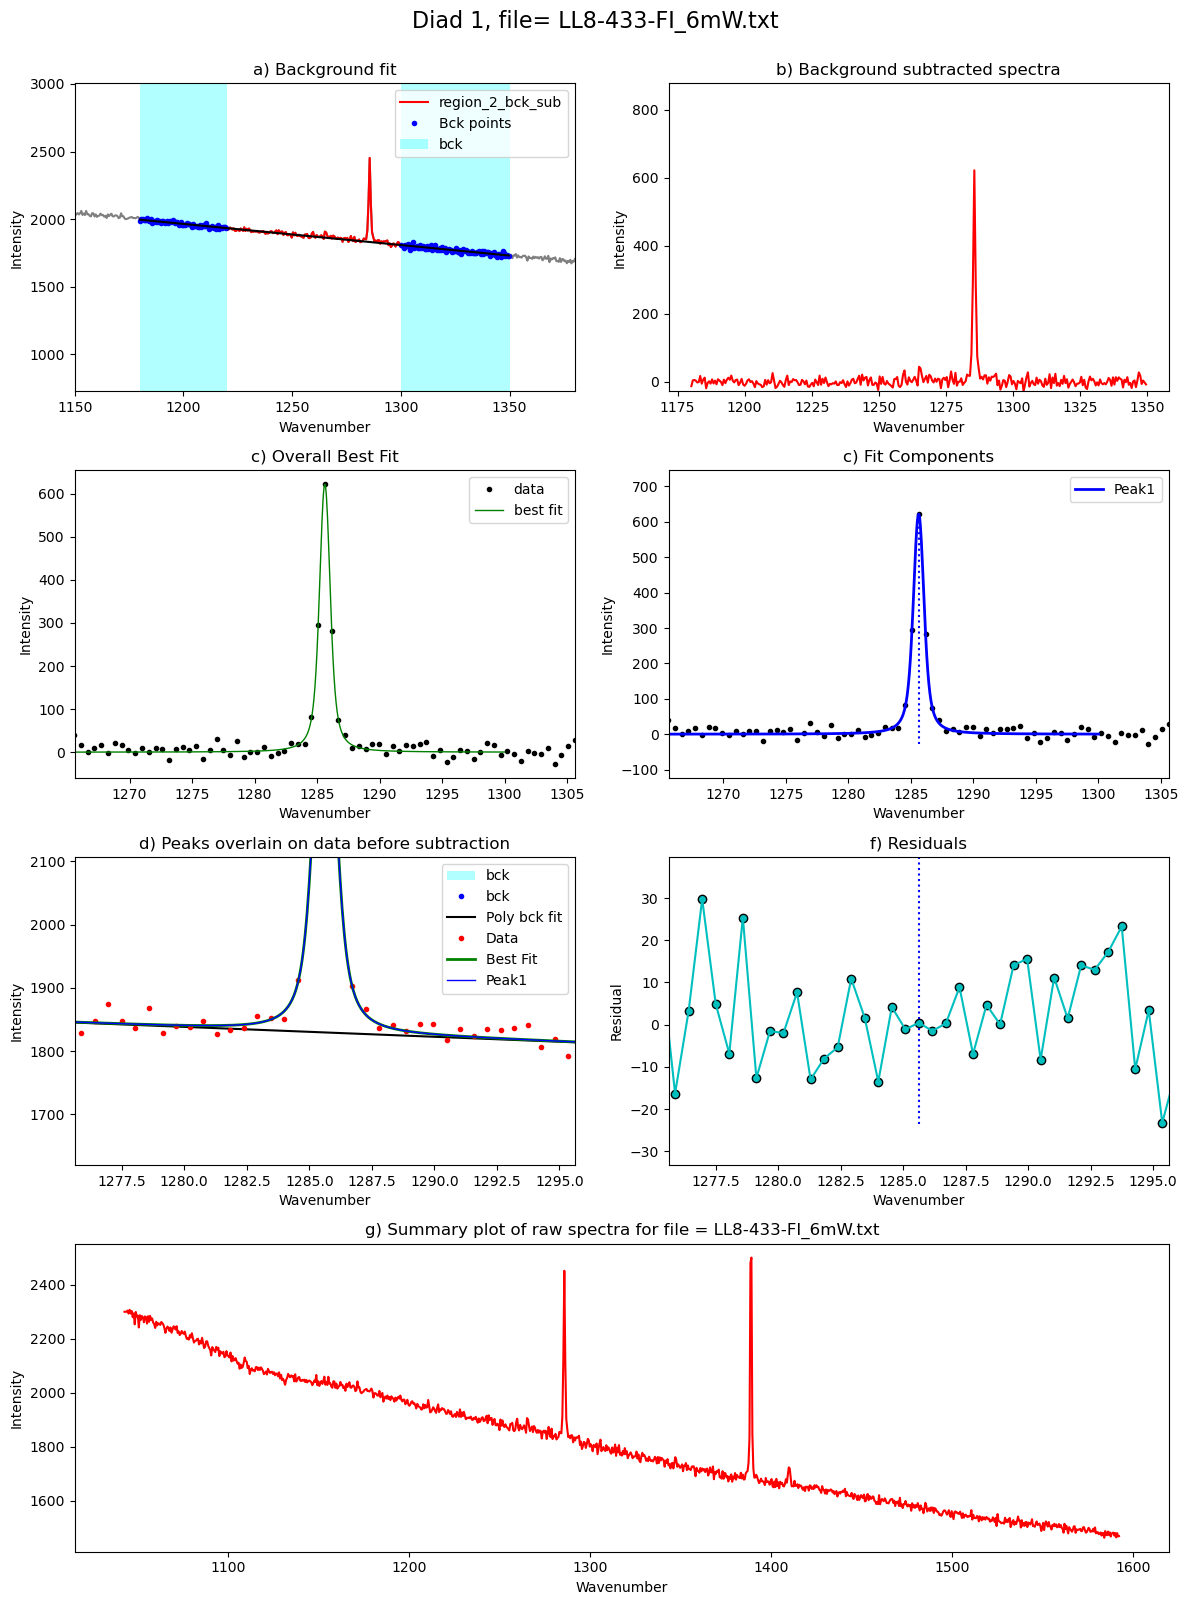

In [34]:
from tqdm.autonotebook import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself
to_clipboard=False # Copies to clipboard
Diad_Files_Weak_i=Diad_Files_Weak
df_Weak = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files_Weak))):
    
    filename=Diad_Files_Weak[i]

    generic_fit=pf.fit_generic_peak(config=generic_Config, path=spectra_path, 
filename=filename, filetype=filetype)


    diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
            path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
    n_peaks_diad2=n_peaks_diad2, plot_figure=False)

    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,
    path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)
    
    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=close_figure)
    
    data=pf.combine_diad_outputs(filename=filename, prefix=False, 
Diad1_fit=Diad1_fit, path=spectra_path,
 to_clipboard=to_clipboard,                    
Diad2_fit=Diad2_fit, Carb_fit=generic_fit)
    
 

    df_Weak = pd.concat([df_Weak, data], axis=0)


In [35]:
df_Weak

filename   Splitting  Diad1_Combofit_Cent  Diad1_Combofit_Height  \
0      LL4-FI1-#1  103.256112          1285.318872             236.157502   
0  LL4-FI1-#2 (1)  103.246771          1285.353581             584.401822   
0      LL4-FI1-#2  103.251472          1285.366771            1238.621086   
0      LL7-109-FI  103.463657          1284.820769             156.952596   
0        LL7-FI33  103.230218          1285.409624            1116.115898   
0  LL8-433-FI_6mW  103.153638          1285.619777             622.236768   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  \
0       1285.318872        361.565817           0.319542           0.319542   
0       1285.353581        900.469477           0.321588           0.321588   
0       1285.366771       1851.081676           0.311910           0.311910   
0       1284.820769        327.280925           0.435205           0.435205   
0       1285.409624       1611.775211           0.301396           0.301396   
0       1285.619777        848.632689           0.284646           0.284646   

   Residual_Diad1  Diad2_Combofit_Cent  ...  Diad2_Voigt_Cent  \
0        3.052371          1388.574984  ...       1388.574984   
0        3.336063          1388.600352  ...       1388.600352   
0        6.037185          1388.618244  ...       1388.618244   
0        4.593689          1388.284426  ...       1388.284426   
0        7.702184          1388.639842  ...       1388.639842   
0        9.541684          1388.773414  ...       1388.773414   

   Diad2_Voigt_Area  Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Residual_Diad2  \
0        576.556547           0.276415           0.276415        3.421127   
0       1384.260580           0.274762           0.274762        4.467551   
0       2814.896157           0.270435           0.270435        8.659590   
0        496.809427           0.333133           0.333133       10.190596   
0       2436.552793           0.264481           0.264481        8.768349   
0       1164.117202           0.213779           0.213779        9.979458   

   HB1_Cent  HB1_Area  Peak_Cent_SO2  Peak_Area_SO2  Peak_Height_SO2  
0       NaN         0    1150.771368      86.866292        59.925067  
0       NaN         0    1150.681227     100.256233        69.741460  
0       NaN         0    1150.699718     180.177769       139.456798  
0       NaN         0    1150.955855      30.602795       131.457504  
0       NaN         0    1151.753717       9.160014        36.212493  
0       NaN         0    1155.220750       0.693479         2.640317  

[6 rows x 21 columns]

In [36]:
len(df_Weak)

6

In [37]:
df_Weak.head()

filename   Splitting  Diad1_Combofit_Cent  Diad1_Combofit_Height  \
0      LL4-FI1-#1  103.256112          1285.318872             236.157502   
0  LL4-FI1-#2 (1)  103.246771          1285.353581             584.401822   
0      LL4-FI1-#2  103.251472          1285.366771            1238.621086   
0      LL7-109-FI  103.463657          1284.820769             156.952596   
0        LL7-FI33  103.230218          1285.409624            1116.115898   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  \
0       1285.318872        361.565817           0.319542           0.319542   
0       1285.353581        900.469477           0.321588           0.321588   
0       1285.366771       1851.081676           0.311910           0.311910   
0       1284.820769        327.280925           0.435205           0.435205   
0       1285.409624       1611.775211           0.301396           0.301396   

   Residual_Diad1  Diad2_Combofit_Cent  ...  Diad2_Voigt_Cent  \
0        3.052371          1388.574984  ...       1388.574984   
0        3.336063          1388.600352  ...       1388.600352   
0        6.037185          1388.618244  ...       1388.618244   
0        4.593689          1388.284426  ...       1388.284426   
0        7.702184          1388.639842  ...       1388.639842   

   Diad2_Voigt_Area  Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Residual_Diad2  \
0        576.556547           0.276415           0.276415        3.421127   
0       1384.260580           0.274762           0.274762        4.467551   
0       2814.896157           0.270435           0.270435        8.659590   
0        496.809427           0.333133           0.333133       10.190596   
0       2436.552793           0.264481           0.264481        8.768349   

   HB1_Cent  HB1_Area  Peak_Cent_SO2  Peak_Area_SO2  Peak_Height_SO2  
0       NaN         0    1150.771368      86.866292        59.925067  
0       NaN         0    1150.681227     100.256233        69.741460  
0       NaN         0    1150.699718     180.177769       139.456798  
0       NaN         0    1150.955855      30.602795       131.457504  
0       NaN         0    1151.753717       9.160014        36.212493  

[5 rows x 21 columns]

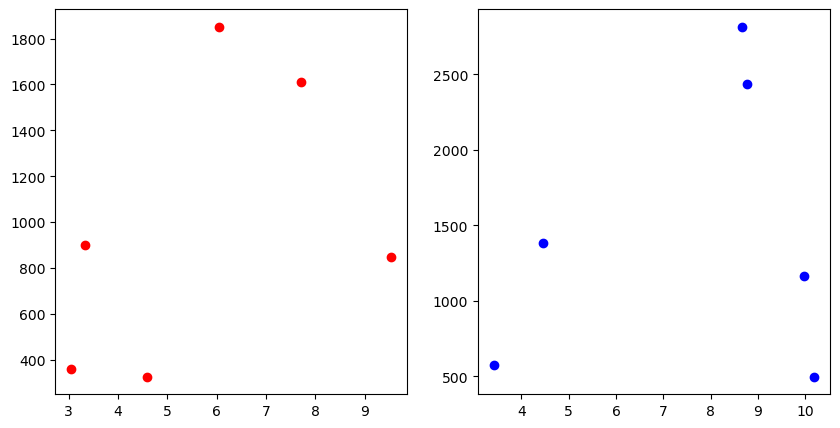

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Weak['Residual_Diad1'],df_Weak['Diad1_Voigt_Area'],  'or')
ax2.plot(df_Weak['Residual_Diad2'],df_Weak['Diad2_Voigt_Area'],  'ob')
ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)
df_not_too_Dense=df_Weak #.loc[(df_Weak['Diad1_Voigt_Area']>25) & (df_Weak['Diad2_Voigt_Area']>30)]

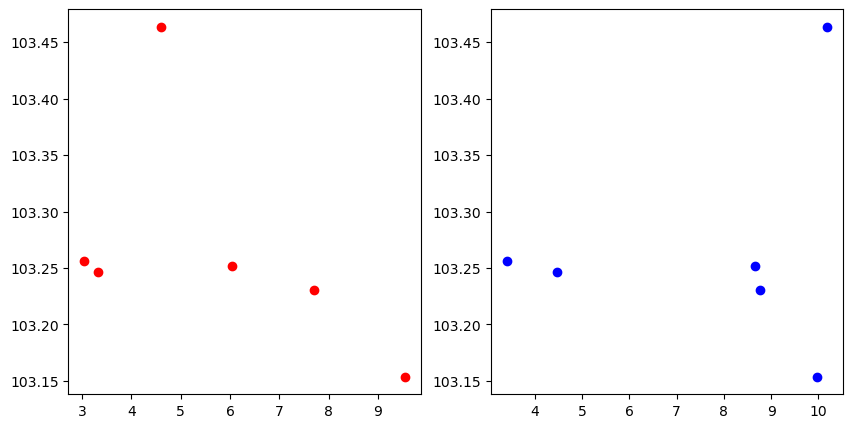

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Weak['Residual_Diad1'],df_Weak['Splitting'],  'or')
ax2.plot(df_Weak['Residual_Diad2'],df_Weak['Splitting'],  'ob')
ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)
df_not_too_Dense=df_Weak #.loc[(df_Weak['Diad1_Voigt_Area']>25) & (df_Weak['Diad2_Voigt_Area']>30)]

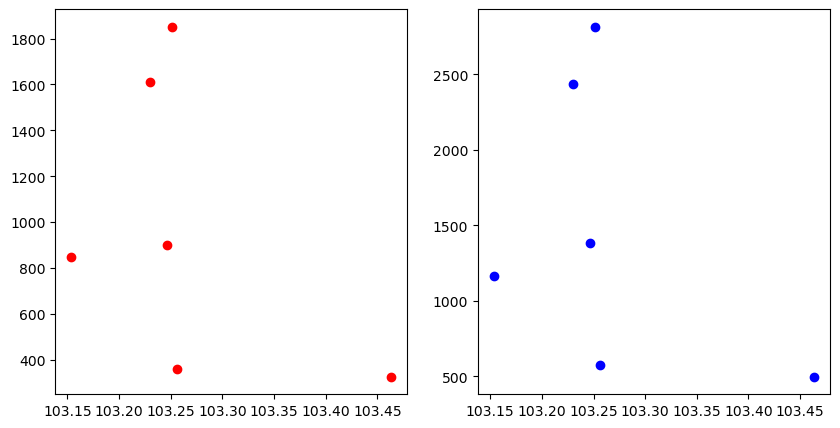

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Weak['Splitting'], df_Weak['Diad1_Voigt_Area'], 'or')
ax2.plot(df_Weak['Splitting'], df_Weak['Diad2_Voigt_Area'], 'ob')

df_not_too_Dense=df_Weak #.loc[(df_Weak['Diad1_Voigt_Area']>25) & (df_Weak['Diad2_Voigt_Area']>30)]

## Stitching metadata and data together

In [42]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df_not_too_Dense['filename'].reset_index(drop=True),
   file_type='.txt')

file_s

array(['LL4-FI1-#1', 'LL4-FI1-#2 (1)', 'LL4-FI1-#2', 'LL7-109-FI',
       'LL7-FI33', 'LL8-433-FI_6mW'], dtype=object)

In [43]:
# Combining them together
meta['name_for_matching']=file_m
df_not_too_Dense['name_for_matching']=file_s
df_combo=df_not_too_Dense.merge(meta, on='name_for_matching')

In [44]:
file_m

array(['LL8-245_nodiad', 'LL8-433-FI_12mW', 'LL8-433-FI_6mW',
       'LL7-107-FI#1_nodiad', 'LL7-107-FI#2_12mW1acc', 'LL7-107-FI#2_6mW'],
      dtype=object)

In [45]:
file_s

array(['LL4-FI1-#1', 'LL4-FI1-#2 (1)', 'LL4-FI1-#2', 'LL7-109-FI',
       'LL7-FI33', 'LL8-433-FI_6mW'], dtype=object)

In [46]:
df_combo.to_clipboard(excel=True)

In [47]:
df_combo

filename_x   Splitting  Diad1_Combofit_Cent  Diad1_Combofit_Height  \
0  LL8-433-FI_6mW  103.153638          1285.619777             622.236768   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  \
0       1285.619777        848.632689           0.284646           0.284646   

   Residual_Diad1  Diad2_Combofit_Cent  ...          filename_y  \
0        9.541684          1388.773414  ...  LL8-433-FI_6mW.txt   

                date  power (mW)  Int_time (s)  accumulations  Mag (X)  \
0  October 7, 2022\n        6.03          45.0            5.0     50.0   

              duration     24hr_time  sec since midnight  Spectral Center  
0  ['0h', '3m', '47s']  3:38:52 PM\n             56332.0         1324.987  

[1 rows x 32 columns]

## Now load in the model for doing the Ne fitting

In [48]:
from pickle import load
import pickle
import os
pickle_path=os.getcwd()
file_pkl=pickle_path + '/' + 'Ne_Line_Regression_Example_ML1.pck'
with open(file_pkl, 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\penny\\Google Drive\\My Drive\\Berkeley_NEW\\DiadFit_outer\\Testing\\Error_Leilani/Ne_Line_Regression_Example_ML1.pck'

In [49]:
pickle_path

'C:\\Users\\penny\\Google Drive\\My Drive\\Berkeley_NEW\\DiadFit_outer\\Testing\\Error_Leilani'

In [60]:
df_combo['Ne_Correction']=my_loaded_model(df_combo['sec since midnight'])
df_combo.insert(1,'Corrected_Splitting', df_combo['Ne_Correction']*df_combo['Splitting'])

In [61]:
df_combo.to_clipboard(excel=True)

In [62]:
density_df=pf.calculate_density_cornell(temp='SupCrit', Split=df_combo['Corrected_Splitting'])
df_combo.insert(1, 'Density', density_df['Preferred D'])

In [63]:
df_MIs=df_combo.loc[df_combo['filename_x'].str.contains('MI')]
df_MIs.to_clipboard(excel=True)
df_MIs

Empty DataFrame
Columns: [filename_x, Density, Corrected_Splitting, Splitting, Diad1_Cent, Diad1_Area, Diad1_Sigma, Diad1_Gamma, Residual_Diad1, Diad2_Cent, Diad2_Area, Diad2_Sigma, Diad2_Gamma, Residual_Diad2, HB1_Cent, HB1_Area, HB2_Cent, HB2_Area, C13_Cent, C13_Area, Carb_Cent, Carb_Area, Carb_Area/Diad_Area, name_for_matching, filename_y, date, power (mW), Int_time (s), accumulations, Mag (X), duration, 24hr_time, sec since midnight, Spectral Center, Ne_Correction]
Index: []

[0 rows x 35 columns]

In [64]:
df_FIs=df_combo.loc[df_combo['filename_x'].str.contains('FI')].reset_index(drop=True)

In [65]:
df_combo

filename_x   Density  Corrected_Splitting   Splitting  \
0        08 MLP_11_FIA_8mW  0.244993           103.349150  103.551691   
1     09 MLP_11_FIA_8mW_r1  0.243542           103.345714  103.549200   
2         11 MLP_9_FIA_8mW  0.209252           103.263525  103.469764   
3      12 MLP_9_FIA_8mW_r1  0.213471           103.273747  103.480784   
4      14 MLP_9_FIB_8mW_r1  0.185507           103.205371  103.414625   
5      15 MLP_9_FIB_8mW_r2  0.183231           103.199741  103.410105   
6     17 MLP_12_FIA_50X_r1  0.252250           103.366281  103.579520   
7     18 MLP_12_FIA_50X_r2  0.255424           103.373750  103.587899   
8        20 MLP_12_FIB_8mW  0.280903           103.433165  103.650334   
9     21 MLP_12_FIB_8mW_r2  0.279629           103.430217  103.648218   
10  26 MLP_18_FIA_8mW_edge  0.226551           103.305239  103.527837   
11        28 MLP_22_FIA_r1  0.114522           103.024742  103.249914   
12  29 MLP_22_FIA_r2_vweak  0.148071           103.113958  103.340209   

     Diad1_Cent   Diad1_Area  Diad1_Sigma  Diad1_Gamma  Residual_Diad1  \
0   1284.931380  2291.574909     0.424951     0.424951        5.759161   
1   1284.939080  2326.146849     0.429127     0.429127        6.310792   
2   1285.124750  1640.918860     0.383008     0.383008        4.414311   
3   1285.114789  1043.905411     0.381152     0.381152        3.321618   
4   1285.306968   752.533062     0.353361     0.353361        2.482244   
5   1285.300137   933.895512     0.358256     0.358256        3.142864   
6   1284.862490   716.538436     0.465727     0.465727        3.061198   
7   1284.856849   750.931458     0.438505     0.438505        2.989196   
8   1284.758973   958.949488     0.476239     0.476239        3.274594   
9   1284.763881  1104.691254     0.465693     0.465693        3.947462   
10  1284.948216   173.361548     0.494153     0.494153        3.245110   
11  1285.708082   300.861318     0.298577     0.298577        2.921871   
12  1285.699014    61.212993     0.327805     0.327805        3.515604   

     Diad2_Cent  ...                date  power (mW)  Int_time (s)  \
0   1388.483071  ...  October 29, 2022\n       8.068          45.0   
1   1388.488279  ...  October 29, 2022\n       8.028          45.0   
2   1388.594514  ...  October 29, 2022\n       8.041          45.0   
3   1388.595573  ...  October 29, 2022\n       8.067          45.0   
4   1388.721593  ...  October 29, 2022\n       8.128          45.0   
5   1388.710242  ...  October 29, 2022\n       8.160          45.0   
6   1388.442010  ...  October 29, 2022\n       8.061          45.0   
7   1388.444748  ...  October 29, 2022\n       8.069          45.0   
8   1388.409307  ...  October 29, 2022\n       8.049          45.0   
9   1388.412100  ...  October 29, 2022\n       8.037          45.0   
10  1388.476053  ...  October 29, 2022\n       7.979          45.0   
11  1388.957995  ...  October 29, 2022\n       7.960          45.0   
12  1389.039223  ...  October 29, 2022\n       7.961          45.0   

    accumulations  Mag (X)             duration      24hr_time  \
0             3.0     50.0  ['0h', '2m', '16s']  10:13:14 AM\n   
1             3.0     50.0  ['0h', '2m', '16s']  10:16:54 AM\n   
2             3.0     50.0  ['0h', '2m', '16s']  10:27:50 AM\n   
3             3.0     50.0  ['0h', '2m', '16s']  10:30:41 AM\n   
4             3.0     50.0  ['0h', '2m', '16s']  10:39:12 AM\n   
5             3.0     50.0  ['0h', '2m', '16s']  10:43:13 AM\n   
6             3.0     50.0  ['0h', '2m', '16s']  10:52:14 AM\n   
7             3.0     50.0  ['0h', '2m', '16s']  10:55:25 AM\n   
8             3.0     50.0  ['0h', '2m', '16s']  11:05:49 AM\n   
9             3.0     50.0  ['0h', '2m', '16s']  11:08:53 AM\n   
10            3.0     50.0  ['0h', '2m', '16s']  11:27:41 AM\n   
11            3.0     50.0  ['0h', '2m', '16s']  11:42:03 AM\n   
12            3.0     50.0  ['0h', '2m', '16s']  11:46:41 AM\n   

    sec since midnight  Spectral Center  Ne_Correc

In [66]:
df_FIs

filename_x   Density  Corrected_Splitting   Splitting  \
0        08 MLP_11_FIA_8mW  0.244993           103.349150  103.551691   
1     09 MLP_11_FIA_8mW_r1  0.243542           103.345714  103.549200   
2         11 MLP_9_FIA_8mW  0.209252           103.263525  103.469764   
3      12 MLP_9_FIA_8mW_r1  0.213471           103.273747  103.480784   
4      14 MLP_9_FIB_8mW_r1  0.185507           103.205371  103.414625   
5      15 MLP_9_FIB_8mW_r2  0.183231           103.199741  103.410105   
6     17 MLP_12_FIA_50X_r1  0.252250           103.366281  103.579520   
7     18 MLP_12_FIA_50X_r2  0.255424           103.373750  103.587899   
8        20 MLP_12_FIB_8mW  0.280903           103.433165  103.650334   
9     21 MLP_12_FIB_8mW_r2  0.279629           103.430217  103.648218   
10  26 MLP_18_FIA_8mW_edge  0.226551           103.305239  103.527837   
11        28 MLP_22_FIA_r1  0.114522           103.024742  103.249914   
12  29 MLP_22_FIA_r2_vweak  0.148071           103.113958  103.340209   

     Diad1_Cent   Diad1_Area  Diad1_Sigma  Diad1_Gamma  Residual_Diad1  \
0   1284.931380  2291.574909     0.424951     0.424951        5.759161   
1   1284.939080  2326.146849     0.429127     0.429127        6.310792   
2   1285.124750  1640.918860     0.383008     0.383008        4.414311   
3   1285.114789  1043.905411     0.381152     0.381152        3.321618   
4   1285.306968   752.533062     0.353361     0.353361        2.482244   
5   1285.300137   933.895512     0.358256     0.358256        3.142864   
6   1284.862490   716.538436     0.465727     0.465727        3.061198   
7   1284.856849   750.931458     0.438505     0.438505        2.989196   
8   1284.758973   958.949488     0.476239     0.476239        3.274594   
9   1284.763881  1104.691254     0.465693     0.465693        3.947462   
10  1284.948216   173.361548     0.494153     0.494153        3.245110   
11  1285.708082   300.861318     0.298577     0.298577        2.921871   
12  1285.699014    61.212993     0.327805     0.327805        3.515604   

     Diad2_Cent  ...                date  power (mW)  Int_time (s)  \
0   1388.483071  ...  October 29, 2022\n       8.068          45.0   
1   1388.488279  ...  October 29, 2022\n       8.028          45.0   
2   1388.594514  ...  October 29, 2022\n       8.041          45.0   
3   1388.595573  ...  October 29, 2022\n       8.067          45.0   
4   1388.721593  ...  October 29, 2022\n       8.128          45.0   
5   1388.710242  ...  October 29, 2022\n       8.160          45.0   
6   1388.442010  ...  October 29, 2022\n       8.061          45.0   
7   1388.444748  ...  October 29, 2022\n       8.069          45.0   
8   1388.409307  ...  October 29, 2022\n       8.049          45.0   
9   1388.412100  ...  October 29, 2022\n       8.037          45.0   
10  1388.476053  ...  October 29, 2022\n       7.979          45.0   
11  1388.957995  ...  October 29, 2022\n       7.960          45.0   
12  1389.039223  ...  October 29, 2022\n       7.961          45.0   

    accumulations  Mag (X)             duration      24hr_time  \
0             3.0     50.0  ['0h', '2m', '16s']  10:13:14 AM\n   
1             3.0     50.0  ['0h', '2m', '16s']  10:16:54 AM\n   
2             3.0     50.0  ['0h', '2m', '16s']  10:27:50 AM\n   
3             3.0     50.0  ['0h', '2m', '16s']  10:30:41 AM\n   
4             3.0     50.0  ['0h', '2m', '16s']  10:39:12 AM\n   
5             3.0     50.0  ['0h', '2m', '16s']  10:43:13 AM\n   
6             3.0     50.0  ['0h', '2m', '16s']  10:52:14 AM\n   
7             3.0     50.0  ['0h', '2m', '16s']  10:55:25 AM\n   
8             3.0     50.0  ['0h', '2m', '16s']  11:05:49 AM\n   
9             3.0     50.0  ['0h', '2m', '16s']  11:08:53 AM\n   
10            3.0     50.0  ['0h', '2m', '16s']  11:27:41 AM\n   
11            3.0     50.0  ['0h', '2m', '16s']  11:42:03 AM\n   
12            3.0     50.0  ['0h', '2m', '16s']  11:46:41 AM\n   

    sec since midnight  Spectral Center  Ne_Correc

In [67]:
FIs_AL=pf.convert_co2_dens_press_depth(T_K=1200+273.15,
    CO2_dens_gcm3=df_FIs['Density'].reset_index(drop=True),
    crust_dens_kgm3='ryan_lerner',
    g=9.81, output='df')

FIs_27=pf.convert_co2_dens_press_depth(T_K=1200+273.15,
    CO2_dens_gcm3=df_FIs['Density'].reset_index(drop=True),
    crust_dens_kgm3=2500,
    g=9.81, output='df')
FIs_AL.replace([np.inf, -np.inf], np.nan, inplace=True)
FIs_27.replace([np.inf, -np.inf], np.nan, inplace=True)

In [68]:
df_FIs['P_Kbar']=FIs_AL['Pressure (kbar)']
df_FIs['Depth (Lerner)']=FIs_AL['Depth (km)']
df_FIs['Depth 2500']=FIs_27['Depth (km)']


In [69]:
df_FIs.to_clipboard(excel=True)

In [103]:
plt.hist(df_FIs['Depth (Lerner)'], ec='r', fc='blue', ec='k')
plt.hist(df_FIs['Depth 2500'], ec='k', fc='red', alpha=0.1)

SyntaxError: keyword argument repeated: ec (435691644.py, line 1)

Text(0.5, 0, 'Density')

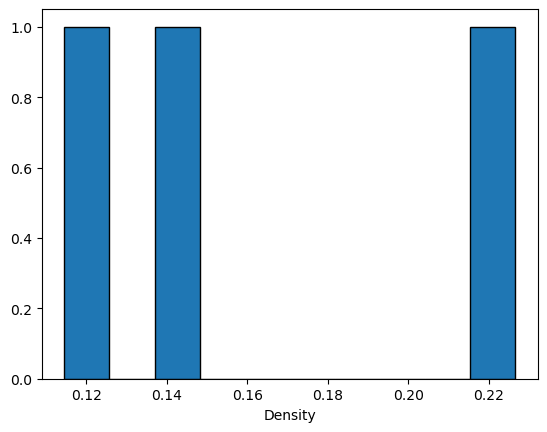

In [104]:
plt.hist(df_FIs['Density'], ec='k')
plt.xlabel('Density')

In [105]:
df_MIs=df_combo.loc[df_combo['filename_x'].str.contains('MI')].reset_index(drop=True)

In [106]:
df_MIs.to_clipboard(excel=True)